# **Linear Algebra**
0. Setting
1. Linear Systemp
2. Linear Combination, Two Views of Matrix Multiplication
3. Linearly Independent, Span, Subspace
4. Linear Transformation
5. Least Squares
6. Elgendecomposition
7. Advanced Elgendecomposition
8. Singular Value Decomposition

# **0. Setting**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
from sympy.solvers.solveset import linsolve
from _util.plot_helpers import *
from _util.plot_helper import *

sy.init_printing()
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
def plotVectors(vecs, colors, alpha=1):
    """
    Determinant 섹션의 plot에 사용하기 위한 custom function입니다.

    Parameters
    ----------
    vecs : plot할 vector(numpy array)의 list  (e.g., [[1, 3], [2, 2]] )
    colors : 각 vector의 color  (e.g., ['red', 'blue'])
    alpha : 투명도

    Returns
    -------
    fig : figure
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]], angles='xy', 
                   scale_units='xy', scale=1, color=colors[i],alpha=alpha_i)

# **1. Linear System**

## 1.1 Matrix operation  
> Matrix addition $\cdot$ matrix multiplication은 Matrix $A,B,C$와 constant$c$에 대해 다음 식을 만족한다.

> Addition
1.   $A+ B= B+ A$ 
2.   $(A+B)+ C=A+(B+C)$
3.   $c(A+B)=cA+cB$
4.   $(c+d)A=cA+c{D}$
5.   $c(dA)=(cd)A$
6.   $A+{0}=A$, where ${0}$ is the zero matrix
7.   For any $A$, there exists an $- A$, such that $ A+(- A)=0$.

> Multiplication
1.   $ A({BC})=({AB}) C$
2.   $c({AB})=(cA)B=A(cB)$
3.   $A(B+ C)={AB}+{AC}$
4.   $(B+C)A={BA}+{CA}$
5.   $AB \neq BA$

In [3]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("elementwise product:\n", A * B)
print("matrix product:\n", A @ B)

elementwise product:
 [[ 5 12]
 [21 32]]
matrix product:
 [[19 22]
 [43 50]]


> Matrix transpose는 Matrix $A,B$와 constant $c$에 대해 다음 식을 만족한다.

1. $(A^T)^T = A$
2. $(A+B)^T=A^T+B^T$
3. $(cA)^T=cA^T$
4. $(AB)^T=B^TA^T$

## 1.2 Linear System
> Linear system은 $n(>=1)$개의 linear equatrion(일차 방정식)들의 collection을 뜻한다. 동일한 n개의 variable을 가진 m개의 일차 방정식들은 다음과 같이 표현할 수 있다.

$$ a_{11}x_{1}+a_{12}x_{2}+a_{13}x_{3}+\cdots +a_{1n}x_{n}=b_{1} \\ 
a_{21}x_{1}+a_{22}x_{2}+a_{13}x_{3}+\cdots +a_{2n}x_{n}=b_{2} \\
\cdots \\
a_{m1}x_{1}+a_{m2}x_{2}+a_{m3}x_{3}+\cdots +a_{mn}x_{n}=b_{m}
$$

### n=2일 때, linear system

> 다음과 같은 일차방정식이 있을 때,

$$ x_1 + x_2 = 6 \\ x_1 - x_2 = -4 $$

> 두 linear equation을 plot한다면

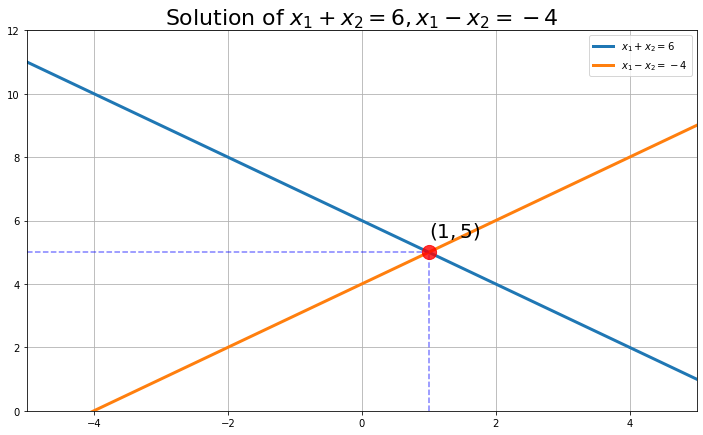

In [4]:
x1 = np.linspace(-5, 5, 100)
x2_1 = -x1 + 6
x2_2 = x1 + 4

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(1, 5, s = 200, zorder = 5, color = 'r', alpha = .8)

ax.plot(x1, x2_1, lw = 3, label = '$x_1+x_2=6$')
ax.plot(x1, x2_2, lw = 3, label = '$x_1-x_2=-4$')
ax.plot([1, 1], [0, 5], ls = '--', color = 'b', alpha = .5)
ax.plot([-5, 1], [5, 5], ls = '--', color = 'b', alpha = .5)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 12])

ax.legend()
s = '$(1, 5)$'
ax.text(1, 5.5, s, fontsize = 20)
ax.set_title('Solution of $x_1+x_2=6, x_1-x_2=-4$', size = 22)
ax.grid()

> 이 나오게 된다. 따라서 두 직선이 만나는 교점인 $x_1=1, x_2=5$가 주어진 linear equation들을 만족하는 해가 됨을 알 수 있다.

### n = 3일 때, linear system

> 아래와 같은 3개의 linear equation이 있을 때,

$$x_1+2x_2+3x_3=6 \\ 2x_1+5x_2+2x_3=4 \\ 6x_1-3x_2+x_3=2$$

> 세 개의 linear equation을 plot하면

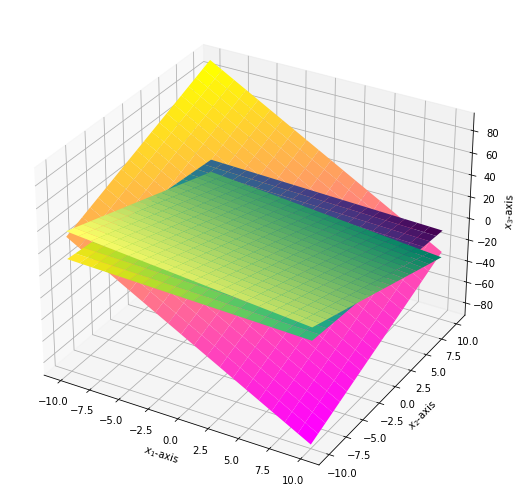

In [5]:
x1 = np.linspace(-10, 10, 20)
x2 = np.linspace(-10, 10, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

X3_1 = (6 - 2*X2 - X1) * (1/3)
ax.plot_surface(X1, X2, X3_1, cmap ='viridis', alpha = 1) 

X3_2 = (4 - 5*X2 - 2*X1) * (1/2)
ax.plot_surface(X1, X2, X3_2, cmap ='summer', alpha = 1)

X3_3 = 2  + 3*X2 - 6*X1
ax.plot_surface(X1, X2, X3_3, cmap ='spring', alpha = 1)

ax.set_xlabel('$x_1$-axis')
ax.set_ylabel('$x_2$-axis')
ax.set_zlabel('$x_3$-axis')

plt.show()

이 나오게 된다. 따라서 n=2일 때와 마찬가지로 세 평면이 만나는 교점을 찾으면 세 linear equation을 만족하는 해가 된다. 이 해를 연립방정식으로 구해보면 

$$Ax=b \\ 
\begin{bmatrix} 
1 & 2 & 3 \\
2 & 5 & 2 \\
6 & -3 & 1 
\end{bmatrix}

\begin{bmatrix} 
x_1 \\
x_2 \\
x_3
\end{bmatrix} = 

\begin{bmatrix} 
6 \\
4 \\
2
\end{bmatrix}$$

> 의 형태로 표현할 수 있다. column을 중심으로 vector를 생각하면

$$x_1 \begin{bmatrix} 1 \\ 2 \\ 6 \end{bmatrix} + x_2 \begin{bmatrix} 2 \\ 5 \\ -3 \end{bmatrix} + x_3 \begin{bmatrix}3 \\ 2 \\ 1 \end{bmatrix} = \begin{bmatrix} 6 \\ 4 \\ 2 \end{bmatrix} $$

> 로 분해할 수 있다. 이 경우에 $x_1,x_2,x_3$은 각 column vector의 계수가 된다.

column vectors: Matrix([[1], [2], [6]]) Matrix([[2], [5], [-3]]) Matrix([[3], [2], [1]])


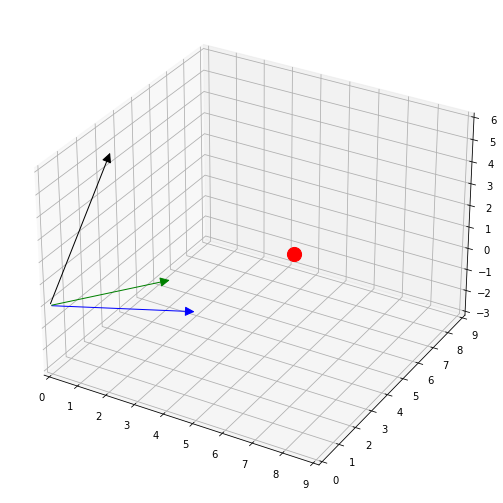

In [7]:
A = sy.Matrix([[1, 2, 3], [2, 5, 2], [6, -3, 1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1, x2, x3])

print("column vectors:", A.col(0), A.col(1), A.col(2))

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(6, 4, 2, s = 200, color='red')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

> 위와 같이 나오게 된다. 즉 세 개의 column vector ([1,2,6],[3,2,1],[2,5,-3])를 linear combination해서 b ([6, 4, 2])를 만드는 계수 $x_1,x_2,x_3$을 찾는 문제로 바뀌게 된다.

*   Row picture: 각 row (linear equation; $a_{i1}x_{1}+a_{i2}x_{2}+a_{i3}x_{3}+\cdots +a_{in}x_{n}=b_{i}$) 들의 교점을 찾는다.
*   Column picture: 각 column (vector; $[a_{1i}, a_{2i}, \cdots, a_{mi}]^T$) 들의 linear combination이 b가 되도록 하는 계수 $x_1, x_2, x_3$을 찾는다.

### 해가 없는 경우의 linear system
> 위의 두 예시는 해가 1개만 존재하는 linear system이었다. 강의에서 배웠듯, $A$의 inverse가 존재하기 때문에, 해 $x$는 한 개만 존재하는 경우이다. 이제 해가 없는 경우인 다음 같은 예시를 보면

$$ x_1 + x_2 + x_3 = 1 \\
x_1 - x_2 - 2x_3 = 2 \\
2x_1 - x_3 = 1 $$

> 위 system을 행렬로 표현하면

$$ Ax = b $$
$$ \begin{bmatrix}
1 & 1 & 1\\
1 & -1 & -2\\
2 & 0 & -1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
1\\
2\\
1
\end{bmatrix} $$

> 이 된다. 이를 column picture로 plot하면

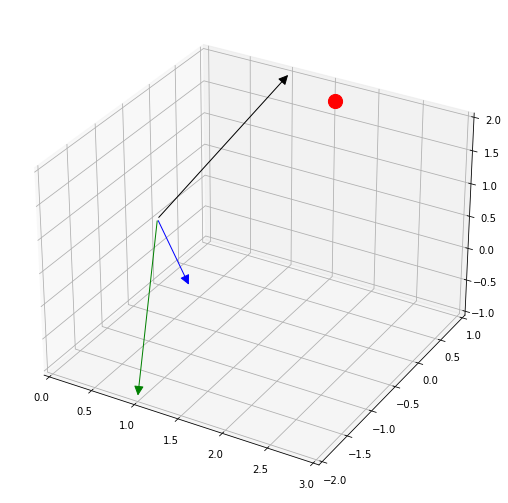

In [8]:
A = sy.Matrix([[1, 1, 1], [1, -1, -2], [2, 0, -1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2,x3])

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(1, 2, 1, s = 200, color = 'red')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

> 세 column vector의 linear combination으로 b (빨간색 점) 를 만들 수 있으면 해가 1개 이상 존재하고, 만드는 것이 불가능 하다면 해가 존재하지 않는다. $A$가 invertible하다면 해 $x$는 반드시 한 개만 존재한다. 따라서 이 경우엔 해가 없기에 $A$는 invertible하지 않고 $det A$가 0이 된다.

### 해가 무수히 많은 경우의 linear system
> 이번엔 해가 무수히 많은 경우의 예시다.

$$ x_2 - x_3 = 4 \\
2x_1 + x_2 + 2x_3 = 4 \\
2x_1 + 2x_2 + x_3 = 8 $$

> 위 system을 행렬로 표현하면

$$ Ax = b $$
$$ \begin{bmatrix}
0 & 1 & -1\\
2 & 1 & 2\\
2 & 2 & 1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
4\\
4\\
8
\end{bmatrix} $$

> 이 된다. 이를 column picture로 plot하면

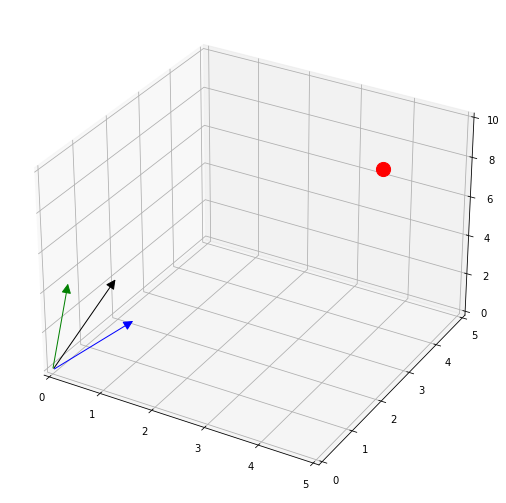

In [9]:
A = sy.Matrix([[0, 1, -1], [2, 1, 2], [2, 2, 1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2,x3])

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

ax.scatter(4,4,8, s = 200, color = 'red')
ax.set(xlim = [0.,5.], ylim = [0.,5.,], zlim = [0., 10.])

plt.show()

> 이 된다. 세 column vector의 linear combination으로 b (빨간색 점) 를 만들 수 있으면 해가 1개 이상 존재하고, 만드는 것이 불가능 하다면 해가 존재하지 않는다.

In [11]:
A = sy.Matrix(((0,1,-1),(2,1,2),(2,2,1)))
b = sy.Matrix((4,4,8))
system = A,b
linsolve(system, x1, x2, x3)

> 위 결과가 의미하는 것은, 어떤 $x_3$의 값에 대해서도 위와 같은 형태의 vector는 해가 된다는 것이다. 즉, $\cdots$ (-3/2, 5, 1) ($x_3$이 1일 경우), (-3, 6, 2) ($x_3$이 2일 경우), $\cdots$, (-3n/2, n+4, n), $\cdots$ 모두가 해가 될 수 있기에, 해가 무수히 많이 존재하는 경우이다. 이때도 마찬가지로 해 $x$가 unique하게 결정되지 않으므로 $det A$는 0이다.

## 1.3 Inverse Matrix
> $n \times n$ 크기의 square matrix $A$의 역행렬 $A^{-1}$은 다음과 같이 정의된다.

$$A^{-1}A = AA^{-1} = I_n$$

> 역행렬이 존재한다는 것은 input vector $x$와 output vector $Ax$ 사이에 일대일 대은 관계가 성립한다는 의미다.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Bijection.svg/225px-Bijection.svg.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>

> 즉, $Ax$로부터 $x$를 복원할 수 있으며, 이를 복원해주는 함수가 $A^{-1}$이다. 

$$x=A^{-1}b$$

In [12]:
A = np.array([[1, 2, 3], [2, 5, 2], [6, -3, 1]])
b = np.array([6, 4, 2])

A_inv = np.linalg.inv(A)
x = A_inv @ b

A @ x, b

(array([6., 4., 2.]), array([6, 4, 2]))

# **2. Linear Combination, Two views of Matrix multiplication**

## 2.1 Linear Combination

> $\{\vec{v_1}, \cdots, \vec{v_p} \} \in \mathbb{R}^n$인 vector들과 scalar $c_1, \cdots, c_p$들로 

$$c_1\vec{v_1} + c_2\vec{v_2} + \cdots + c_p\vec{v_p}$$

> 로 나타내는 것을 Linear combination이라고 한다.

예를 들어, 두 vector $ \begin{bmatrix} 4 \\ 2 \end{bmatrix}   $, $ \begin{bmatrix} -2 \\ 2 \end{bmatrix} $의 linear combination은 다음과 같이 나타낼 수 있다.

$$ c_1\begin{bmatrix} 4 \\ 2 \end{bmatrix} + c_2\begin{bmatrix} -2 \\ 2 \end{bmatrix} $$

이를 plot해보면


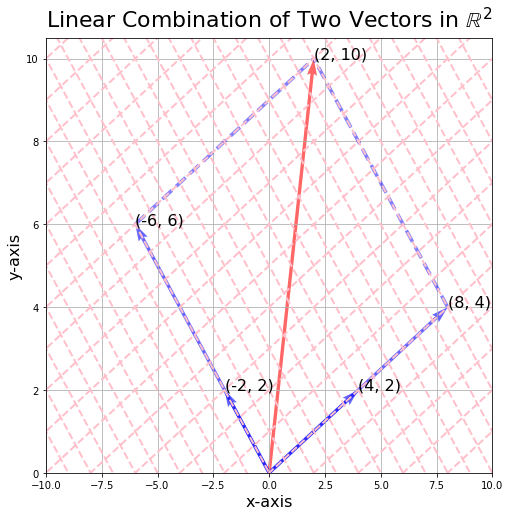

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

vec = np.array([[[0,0,4,2]],
                 [[0,0,-2,2]],
                 [[0,0,2,10]],
                 [[0,0,8,4]], 
                 [[0,0,-6,6]]])
colors = ['b','b','r','b','b']

# tail이 origin, head가 (4,2), (-2,2), (2,10), (8,4), (-6,6)인 vector plot
for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = colors[i], scale=1, alpha = .6)
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

# tail이 (8,4), head가 (2,10)인 vector plot
points12 = np.array([[8,4],[2,10]])
ax.plot(points12[:,0], points12[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

# tail이 (-6,6), head가 (2,10)인 vector plot
points34 = np.array([[-6, 6],[2,10]])
ax.plot(points34[:,0], points34[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-10, 10])
ax.set_ylim([0, 10.5])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

######################################Basis########################################
a = np.arange(-11, 20, 1)
x = np.arange(-11, 20, 1)

# 붉은색 격자 plot
for i in a:    
    y1 = i + 0.5*x  # 0.5(기울기) = 2/4
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 2)
    y2 = i - x  # -1(기울기) = 2/(-2)
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 2)    

ax.set_title('Linear Combination of Two Vectors in $\mathbb{R}^2$', size = 22, x =0.5, y = 1.01)
plt.show()

> 위의 그림은 두 벡터의 linear combination으로 $ \begin{bmatrix} 2 \\ 10 \end{bmatrix}$을 만드는 그립입니다. 

$$ \begin{bmatrix} 2 \\ 10 \end{bmatrix} =  2\begin{bmatrix} 4 \\ 2 \end{bmatrix} + 3\begin{bmatrix} -2 \\ 2 \end{bmatrix} $$

> $\begin{bmatrix} 4 \\ 2 \end{bmatrix}$에 3을 곱하고, $\begin{bmatrix} -2 \\ 2 \end{bmatrix}$에 2를 곱한 뒤 더하면 $\begin{bmatrix} 2 \\ 10 \end{bmatrix}$이 나옴을 알 수 있습니다. 붉은 격자는 두 벡터의 linear combination으로 도달할 수 있는 공간을 의미합니다. 그림에서 해당 붉은 격자가 $R^2$ 전체를 커버함을 확인할 수 있습니다.

## 2.2 Basis

> 2차원 ($R^2$) 공간에서의 basis를 생각해봅시다. 임의의 horizontal vector (i.e., $\begin{bmatrix}x\\0\end{bmatrix}$) 는 $\begin{bmatrix}1\\0\end{bmatrix}$를 상수배 해서 표현할 수 있습니다. 예를 들면, vector $\begin{bmatrix} 5 \\ 0 \end{bmatrix}$는 $5 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} $으로 표현할 수 있습니다. 마찬가지로, 임의의 vertical vector (i.e., $\begin{bmatrix}0\\y\end{bmatrix}$) 는 $\begin{bmatrix}0\\1\end{bmatrix}$를 상수배 해서 표현할 수 있습니다. 위 $\begin{bmatrix}1\\0\end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$을 각각 $\mathbf{i}, \mathbf{j}$라고 합시다.

> $R^2$ 공간에 있는 모든 vector들은 horizontal vector + vertical vector의 합으로 표현이 가능하기 때문에 (i.e., $[x,y] = [x,0] + [0,y]$), 이 말은 즉 $R^2$에 있는 모든 벡터들은 $\mathbf{i}$와 $\mathbf{j}$의 linear combination으로 나타낼 수 있다는 말이 됩니다. 이것이 $\mathbf{i}, \mathbf{j}$의 이름이 basis vector인 이유입니다.

$$
 \left[ \begin{array}{c} 3 \\ 2  \end{array} \right] =
 3\cdot\left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +
 2\cdot\left[ \begin{array}{c} 0 \\ 1  \end{array} \right] =
 3\,\mathbf{i} + 2\,\mathbf{j}
$$

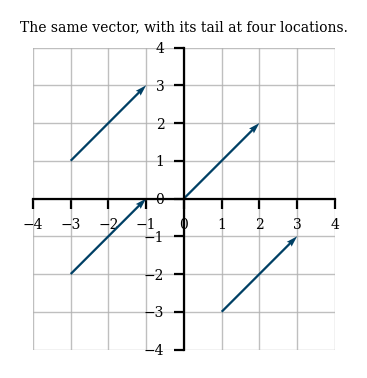

In [14]:
# Note
'''
아래의 plot_vector() 함수는 두 인자를 받습니다: (1) list of vectors, (2) list of tails (optional)
tails를 지정하지 않을 시 자연스럽게 tail은 origin으로 지정됩니다.
'''
# 예시

vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)
pyplot.title("The same vector, with its tail at four locations.");

Text(0.5, 1.0, 'The same vector, with its tail at four locations.')

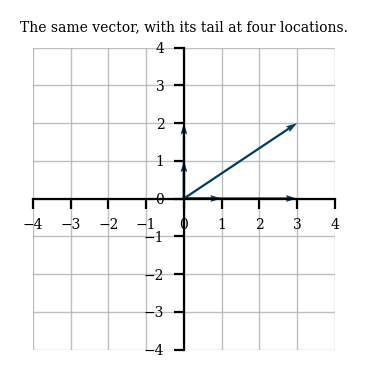

In [15]:
# basis vector
i = np.array((1, 0))
j = np.array((0, 1))

vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)
pyplot.title("The same vector, with its tail at four locations.")

> $\begin{bmatrix}3\\2\end{bmatrix}$가 $\mathbf{i}$와 $\mathbf{j}$의 linear combination으로 표현됨($2*\mathbf{i}+3*\mathbf{j}$)을 알 수 있습니다.

# **3. Linearly Independent, Span, Subspace**

## 3.1 Linearly Independent
> 임의의 basis들로 다른 basis를 linear combination으로 만들 수 없어야 linearly independent하다. 
$$ $$
> 좀 더 정석적인 정의를 살펴보면 
$$x_1\vec{v_1}+x_2\vec{v_2}+\cdots+x_p\vec{v_p}= \empty $$
> 위 식을 성립하는 해가
$$\vec{x} = \begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_p \end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}$$
>만 가지고 있으면 linearly independent하다. 즉, 해를 표현할 방법이 하나만 있어야 한다. 만약 위 해 외에 다른 해를 가지고 있다면 vector들은 서로 linearly dependence하다. 왜냐하면 다음과 같은 상황처럼
$$x_j\vec{v_j} = -x_1\vec{v_1} - x_2\vec{v_2} - \cdots - x_{j-1}\vec{v_{j-1}}$$
$$\vec{v_j} = -{x_1\over x_j}\vec{v_1} - -{x_2\over x_j}\vec{v_2} - \cdots -{x_{j-1}\over x_j}\vec{v_{j-1}} \quad (x_j \neq 0)$$

> $\vec{v_j}$를 $\vec{v_1} ~ \vec{v_{j-1}}$의 linear combination으로 만들 수 있기 때문이다. 이 경우엔
$$\vec{v_j} \in span\{ \vec{v_1}, \cdots, \vec{v_{j-1}} \}$$
> 이기에 결국
$$span\{ \vec{v_1}, \cdots, \vec{v_j} \} = span\{ \vec{v_1}, \cdots, \vec{v_{j-1}} \}$$
> 이 된다. 해를 표현할 많은 방법이 생기게 된다.

## 3.2 Span
> $span \{\vec{v_1}, \cdots, \vec{v_p} \}$은 $\vec{v_1}, \cdots, \vec{v_p} \in \mathbb{r}^n$ vector로 가능한 모든 linear combination의 집합이다.  
>   
> 예를 들어, basis의 linear combination으로  $R^2$의 모든 vector를 만들 수 있다. 이는 $\mathbf{i}, \mathbf{j}$의 span이, $R^2$가 된다는 말입니다. 예를 들어 봅시다. Numpy의 randint 함수를 사용하여 $\mathbf{i}$와 $\mathbf{j}$의 linear combination 1000개를 생성하고, 이를 전부 plot해 보겠습니다.

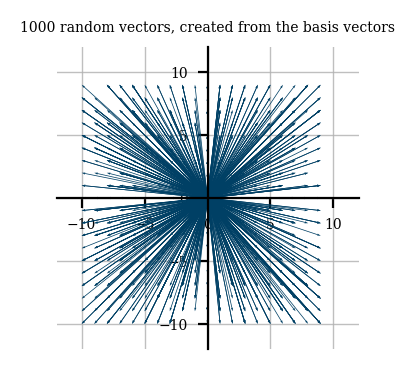

In [16]:
from numpy.random import randint
# span
vectors = []
i = numpy.array((1,0))
j = numpy.array((0,1))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)의 linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from the basis vectors");

> 먄약 무한히 많은 벡터를 생성하면 $\mathbf{R}^2$ 공간을 전부 채울 수 있는 것을 짐작할 수 있다. 즉, basis vector의 span은 $\mathbf{R}^2$ 전체 공간이다. 
>
> $i, j$가 아닌 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$을 사용해서 span을 확인하면 어떻게 될까?

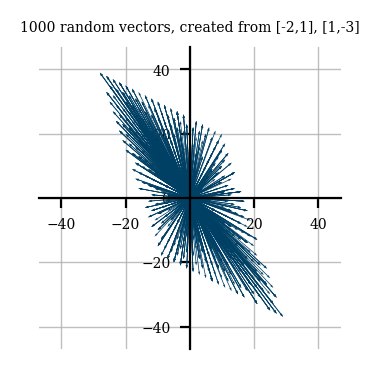

In [17]:
# span
vectors = []
i = numpy.array((-2,1))
j = numpy.array((1,-3))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)의 linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from [-2,1], [1,-3]");

> 결론적으로, 우리는 여전히, 무수히 많은 $\mathbf{i}, \mathbf{j}$가 아닌 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$의 linear combination을 plot할 시 $R^2$를 전부 채울 수 있다는 사실을 짐작할 수 있습니다. 이 말은, 우리는 basis vector로 반드시 $\mathbf{i}, \mathbf{j}$를 사용할 필요가 없다는 말이기도 합니다.

> 그럼 basis vector로 $\mathbf{i}, \mathbf{j}$를 사용할 경우와 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$를 사용할 경우는 무엇이 다를까요? 바로 **계수**입니다.

$$ \begin{bmatrix} -7 \\ 11 \end{bmatrix} = -7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2 * \begin{bmatrix} -2 \\ 1 \end{bmatrix} - 3 * \begin{bmatrix} 1 \\ -3 \end{bmatrix} $$

> 이 계수를 좌표라고 생각해보겠습니다. 만약 $\mathbf{i}, \mathbf{j}$를 basis로 사용할 경우, 좌표는 $(-7, 11)$이 됩니다. 만약  $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$를 basis로 사용할 경우, 좌표는 $(2, -3)$이 됩니다.

> 다시 돌아가서, 이번엔 다른 두 vector를 span해 보겠습니다.  $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$의 linear combination 1000개를 만들어 봅시다.



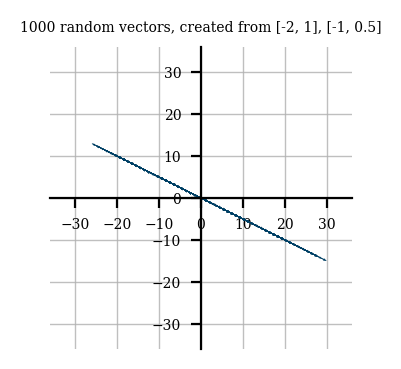

In [18]:
# span
vectors = []
i = numpy.array((-2,1))
j = numpy.array((-1,0.5))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)의 linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from [-2, 1], [-1, 0.5]");

> 앞선 두 예시와는 상황이 다른것을 알 수 있습니다. 두 벡터 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$가 linearly independent 하지 않기 때문에 ($\begin{bmatrix}-2\\1\end{bmatrix} = 2 * \begin{bmatrix}-1\\0.5\end{bmatrix}$), 따라서 두 벡터의 linear combination은 $\begin{bmatrix}-2\\1\end{bmatrix}$의 상수배 밖에 나올 수 없습니다. 즉, 두 벡터의 linear combination으론 2차원 공간을 전부 채울 수 없다는 말이고, 이 말은 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$는 $R^2$의 basis가 될 수 없다는 말과 같습니다.

*   **Basis의 첫 번째 조건**: Basis는 **해당 subspace (위 예시에선 $R^2$)를 span해야 한다** (i.e., basis를linear combination해서 해당 subspace의 어떤 vector라도 만들 수 있어야 한다).

>Basis는 한 가지 조건이 더 있는데, 바로 모든 basis끼리는 서로 independent해야 한다는 것입니다. 예를 들어, $\{ \begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix} \}$는 $R^2$의 basis이지만, $\{ \begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}, \begin{bmatrix}-1\\-2\end{bmatrix} \}$는 $R^2$의 basis가 아닙니다. 왜냐하면, $\begin{bmatrix}-2\\1\end{bmatrix} + \begin{bmatrix}1\\-3\end{bmatrix} = \begin{bmatrix}-1\\2\end{bmatrix}$ , 즉 세 vector는 서로 linearly dependent하기 때문입니다. $R^2$ 공간을 span하는데 두 개의 vector만으로도 충분한데, 3개의 vector나 있는 경우인 것입니다.

*   **Basis의 두 번째 조건**: Basis를 이루는 vector들은 **서로 linearly independent** 해야한다.

> 아래 예시를 봅시다. 아래 초록색 평면은 $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$, $ \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$ 두 vector를 linear combination 했을 때 만들 수 있는 vector들의 공간(=subspace)입니다. 이 subspace의 dimension은 몇일까요? 


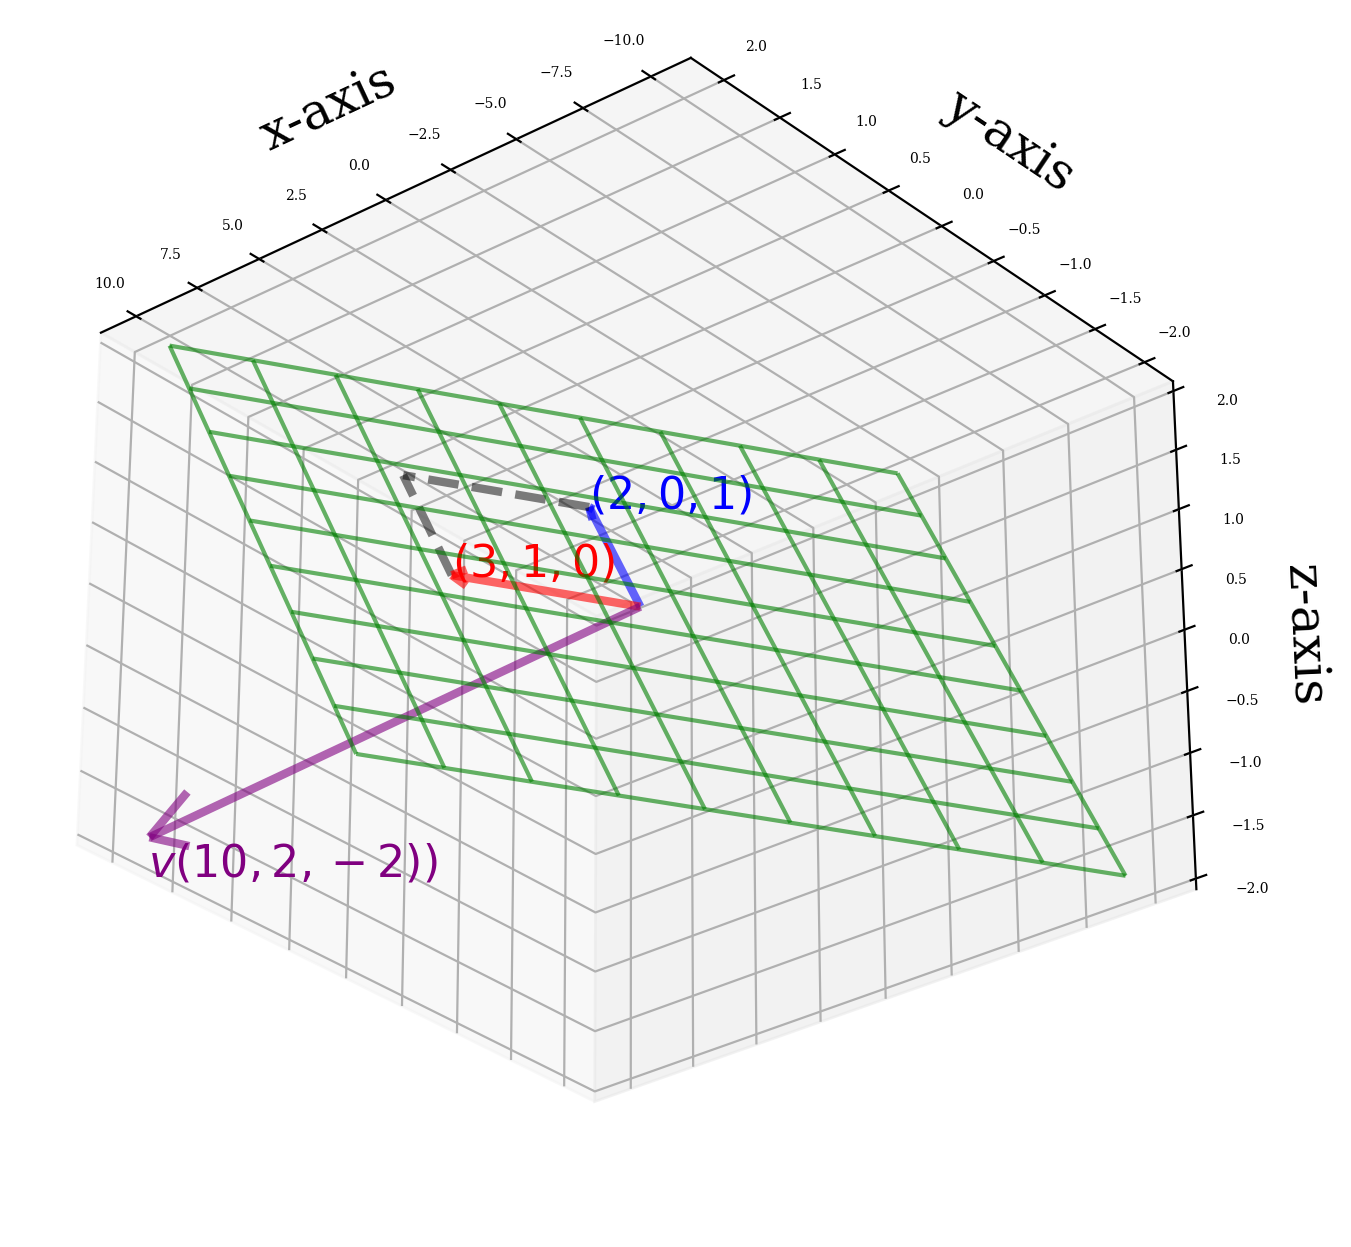

In [19]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')

x2 = np.linspace(-2, 2, 10)
x3 = np.linspace(-2, 2, 10)
X2, X3 = np.meshgrid(x2, x3)
X1 = 3*X2 + 2*X3
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, color = 'g', alpha = .6)

vec = np.array([[[0, 0, 0, 3, 1, 0]],
               [[0, 0, 0, 2, 0, 1]],
               [[0, 0, 0, 10, 2, -2]]])
colors = ['r', 'b', 'purple']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

################################Dashed Line################################

point12 = np.array([[2, 0, 1],[5, 1, 1]])
ax.plot(point12[:,0], point12[:,1], point12[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

point34 = np.array([[3, 1, 0], [5, 1, 1]])
ax.plot(point34[:,0], point34[:,1], point34[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

#################################Texts#######################################
ax.text(x = 3, y = 1, z = 0, s='$(3, 1, 0)$', color = 'red', size = 16)
ax.text(x = 2, y = 0, z = 1, s='$(2, 0, 1)$', color = 'blue', size = 16)
ax.text(x = 10, y = 2, z = -2.3, s='$v (10,2,-2))$', color = 'purple', size = 16)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=130)

> 정의에 의해, 초록 subspace의 dimension은 초록 subspace의 basis의 개수와 같습니다. 그렇다면 초록 subspace의 basis 개수는 몇일까요?

> 이를 확인하기 위해선 $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$, $ \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$ 두 vector가 linearly independent한지만 확인하면 됩니다. 왜냐하면 basis의 첫 번째 조건은 이미 만족하고 있으므로 (애초에 저 둘을 span해서 만든게 초록색 subspace), 두 번째 조건인 linearly independent 여부만 확인하면 됩니다.

> 만약 linearly dependent하다면 어떻게 될까요 (i.e., $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix} = c * \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$) ? 그럴 경우, $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$가 span하는 공간(1-dimension)과 $ \begin{bmatrix}2 \\ 0 \\ 1 \end{bmatrix}$이 span하는 공간(1-dimension)이 동일하기 때문에, 최종 dimension도 1차원이 됩니다. 만약 둘이 linearly independent 하다면, 맨 위 예시의 $\{\mathbf{i},  \mathbf{j}\}$, 혹은 $\{\mathbf{a},  \mathbf{b}\}$ 처럼 둘을 span한 subspace도 2차원이 될 것입니다. 

> 위 두 벡터의 linear independence 여부를 확인해봅시다. numpy의 matrix_rank 함수를 이용하면 이를 쉽게 구할 수 있습니다. 강의에서 배웠듯, matrix $A$ 의 rank는 $A$의 column space의 dimension입니다. 따라서, $A = \begin{bmatrix} 3 & 2 \\ 1 & 0 \\ 0 & 1 \end{bmatrix}  $와 같이 설정하고 A의 rank를 구하면, 두 벡터의 linear independence 여부를 알 수 있습니다 (rank가 1이라면 두 column vector가 span하는 공간이 1차원, rank가 2라면 두 column vector가 span하는 공간이 2차원).

In [20]:
A = np.array([[3,2],[1,0],[0,1]])
np.linalg.matrix_rank(A)

2

> A의 rank가 2이므로, 두 vector는 서로 linearly independent함을 알 수 있고, 따라서 두 vector는 basis의 두 조건을 모두 만족하기 때문에 초록색 subspace의 basis가 됩니다. 결론적으로, 초록 subspace는 전체 $R^3$ 공간 안에 속해있는, 2 dimension의 subspace (i.e., 2차원 평면)가 됩니다.

> 위 그림의 v = $\begin{bmatrix} 10 \\ 2 \\ -2 \end{bmatrix}$ 를 보면, 초록색 subspace 바깥에 위치함을 알 수 있습니다. 이는 무엇을 뜻할까요?

> 잠시 1.2장으로 내용으로 돌아가서, $Ax = b$의 해를 찾는 문제를 다시 생각해봅시다. Column picture의 입장에서, 이는 A의 각 column의 계수를 찾는 문제와 같았습니다.

$$ Ax = b \\
\begin{bmatrix} 3 & 2 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} \\
x_1\begin{bmatrix} 3  \\ 1  \\ 0  \end{bmatrix} + x_2\begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} 
$$

> 1.2장과 연관지어보면, 이러한 행렬 $A$는 어떠한 input $x_1, x_2$를 넣더라도, 초록색 subspace 위에 있지 않은 다른 vector (예를들면 위 그림의 보라색 $v$)를 절대 output으로 낼 수 없다는 사실을 뜻합니다. 이를 다시 말하면, b가 $A$의 column space(=초록색 subspace) 위에 존재해야만 $Ax=b$의 해가 존재한다는 말이 됩니다. 따라서 $Ax=v$의 해는 존재하지 않습니다.

In [22]:
from sympy.solvers.solveset import linsolve

x1, x2 = sy.symbols('x1 x2')
A = sy.Matrix(((3,2),(1,0),(0,1)))
b = sy.Matrix((10,2,-2))
system = A,b
linsolve(system, x1, x2)

## 3.3 Subspace
> Subspace $H$는 linear combination에 닫힌 $\mathbf{R}^n$의 부분집합으로 정의된다.
>
> 이때, linear combination에 닫혀있다는 것은 

$$\begin{aligned} c\vec{u_1}+d\vec{u_2}&=c(a_1\vec{v_1}+\cdots+a_p\vec{v_p}) + d(a_1\vec{v_1}+\cdots+a_p\vec{v_p}) \\
&= (ca_1+da_1)\vec{v_1}+\cdots+(ca_p+da_p)\vec{v_p} \end{aligned}$$

> 이 성립한다는 의미이며 그렇기에 span은 항상 subspace이다.


### Basis of a Subspace
> subspace의 basis는 두 가지 조건을 만족해야 한다.
* 주어진 subspace $H$를 모두 채워야 한다.
* 서로 linearly independent해야 한다.
> 이때, 같은 subspace에서 basis 조합 자체는 여러개가 있을 수 있지만 basis의 개수는 모두 동일하다.

### Column Space of Matrix
> 행렬 A의 column들에 의해 만들어지는 subspace를 Column space of matrix, Col A라고 한다. 예시를 보자면
$$A=\begin{bmatrix} 1 & 1 & 2 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix}, \; \begin{bmatrix} 2 \\ 1 \\ 1 \end{bmatrix}=\begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix} + \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix} \\
\rightarrow Col \, A = span\{ \begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix} \}$$
>으로 A의 3열은 1, 2열의 선형결합으로 만들 수 있기에 basis의 개수는 2개가 되고 이것이 Col A가 된다.

### Rank of Matrix
> 또한 행렬 A의 rank는 Col A의 차원과 같다
$$rank \, A = dim \, Col \, A$$

# **4. Linear Transformation**

## 4.1 Linear Transformation
> Transformation T가 다음과 같은 조건을 만족하면 linear transformation이다.
$$ T(c\vec{u}+d\vec{v})=cT(\vec{u})+dT(\vec{v}) \quad (\vec{u}, \vec{v}는 T의 정의역에 포함된 vector, c와 d는 임의의 scalar) $$
> $y=ax+b$는 $b \, (b \neq 0)$때문에 linear하지 않다. 그러나 이를 행렬로 바꾸어 쓰면
$$ y = \begin{bmatrix} b & a \end{bmatrix} \begin{bmatrix} 1 \\ x \end{bmatrix} $$
>이 식은 linear하다.

## 4.2 Matrix of Linear Transformation
> 위의 Span에서 사용한 예시를 다시 가져와봅시다.

$$ \begin{bmatrix} -7 \\ 11 \end{bmatrix} = -7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2 * \begin{bmatrix} -2 \\ 1 \end{bmatrix} - 3 * \begin{bmatrix} 1 \\ -3 \end{bmatrix} $$

>  $\begin{bmatrix} -2 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ -3 \end{bmatrix}$를 각각 $\mathbf{a}, \mathbf{b}$로 표현하겠습니다. 만약 $\{\mathbf{a}, \mathbf{b}\}$를 basis로 사용할 경우, $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 이 basis의 계수가 $(2, -3)$인 경우로 표현할 수 있습니다. 만약 $\{\mathbf{i}, \mathbf{j}\}$를 basis로 사용할 경우,  $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 이 basis의 계수가 $(-7, 11)$인 경우로 표현할 수 있습니다 (다른 말로 하면, 이 '계수'는 해당 basis에서의 '좌표'라고 할 수 있습니다. 이후 용어는 '좌표'로 통일하겠습니다). $\begin{bmatrix} 2 \\ -3  \end{bmatrix}$,  $\begin{bmatrix} -7 \\ 11  \end{bmatrix}$을 각각 $\mathbf{c}, \mathbf{c'}$라고 하겠습니다.

<h3 align="center">

$\boldsymbol{\cdot}$   $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 basis $\{\mathbf{a}, \mathbf{b}\}$ 에서 좌표 $\mathbf{c} (=\begin{bmatrix} 2 \\ -3  \end{bmatrix})$ 으로 표현된다. \
\
$\boldsymbol{\cdot}$   $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 basis $\{\mathbf{i}, \mathbf{j}\}$ 에서 좌표 $\mathbf{c'} (=\begin{bmatrix} -7 \\ 11  \end{bmatrix})$ 으로 표현된다.
</h3>

>맨 위의 식을 다시 정리해 보겠습니다.

$$
  \left[ \begin{array}{c} -7 \\ 11  \end{array} \right] = 
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ -3  \end{array} \right] \\
   \mathbf{c'} = A\mathbf{c}
$$

> 즉 **[1] matrix $A= \begin{bmatrix} -2 & 1 \\ 1 & -3  \end{bmatrix}$에  basis $\{\mathbf{a}, \mathbf{b}\}$의 좌표 $\mathbf{c}$를 곱하면, basis $\{\mathbf{i}, \mathbf{j}\}$의 좌표 $\mathbf{c'}$을 얻을 수 있음**을 알 수 있습니다. 이에 대해 좀더 자세 알아봅시다.

In [23]:
A = np.array([[-2,1],[1,-3]])
c = np.array([2,-3])
A@c

array([-7, 11])

> **[2] Matrix $A= \begin{bmatrix} -2 & 1 \\ 1 & -3  \end{bmatrix}$에 $\mathbf{i}$를 곱했을 경우 $\mathbf{a}$가 나오고, $\mathbf{j}$를 곱했을 경우 $\mathbf{b}$가 나옴**을 생각할 수 있습니다. \
Custom helper function인 *plot_linear_transformation()* 을 이용해서 위 내용들을 visualize 해봅시다.

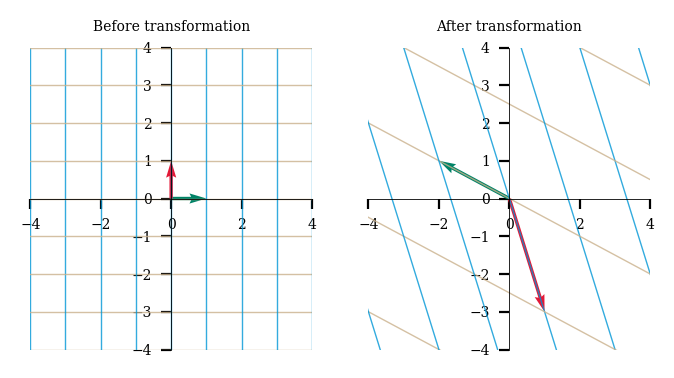

In [24]:
plot_linear_transformation(A)

> 위 그림에서 알 수 있듯, linear transformation은 원점은 원래 위치를 유지한 채, vector들이 다른 vector로 linear transformation하는 것을 알 수 있다. $A$에 $i$(왼쪽 그림의 초록색 vector)를 곱했을 때, $a$(오른쪽 그림의 초록색 vector)가 나오고, $j$(왼쪽 그림의 빨간색 vector)를 곱했을 떈, $b$(오른쪽 그림의 빨간색 vector)가 나오는 것을 알 수 있다.

> 다른 예시를 들어봅시다.

$$ M = \begin{bmatrix} 1 & 2 \\  2  & 1 \end{bmatrix} $$

> 첫 번째 column vector는 $\mathbf{i}$가 transform되는 vector가 되고, 두 번째 column vector는 $\mathbf{j}$가 transform되는 vector가 됩니다 (위의 **[2]**).

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 2 \end{bmatrix}  \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

> 어떤 임의의 vector $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right] = x \mathbf{i} + y \mathbf{j}$는, 다음과 같이 transform 될 것입니다.

$$
T(x) = T(\begin{bmatrix}x\\y\end{bmatrix})=T\Big(\begin{bmatrix}x\\0\end{bmatrix}\Big)+T\Big(\begin{bmatrix}0\\y\end{bmatrix}\Big) = T\Big(x\begin{bmatrix}1\\0\end{bmatrix}\Big)+T\Big(y\begin{bmatrix}0\\1\end{bmatrix}\Big) = x\begin{bmatrix}1\\2\end{bmatrix} + y\begin{bmatrix}2\\1\end{bmatrix}
$$

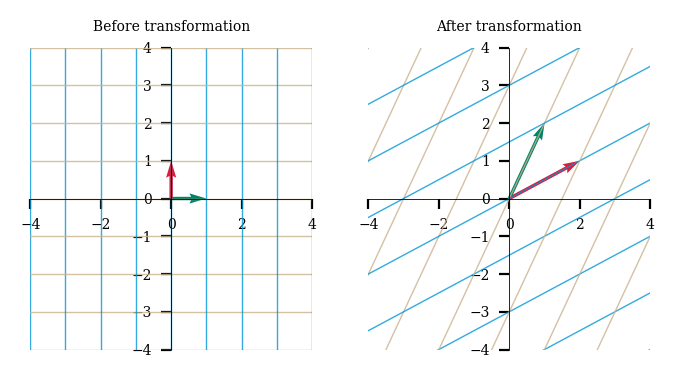

In [25]:
M = np.array([[1, 2], [2, 1]])
plot_linear_transformation(M)

> 이 transformation $M$이 특정한 vector (e.g., $\begin{bmatrix} 0.5 \\ 1 \end{bmatrix}$)를 어떻게 transform 시키는지 보기 위해서, plot_vector() 함수를 활용해서 visualize 해봅시다.

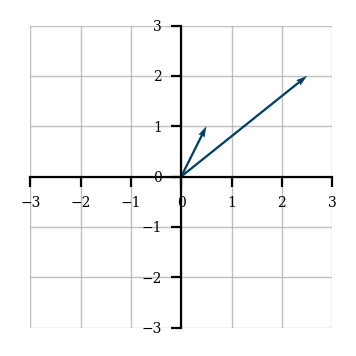

In [26]:
x = np.array((0.5,1))
vectors = [x, M@x]
plot_vector(vectors)

> 이제 linear transformation의 맨 위에서 사용했던 $A$(=$\,\begin{bmatrix} -2 & 1 \\  1 &-3  \end{bmatrix} $ )를 다시 가져오겠습니다. 이 $A$는 $R^2$에 존재하는 임의의 vector $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$ 를 

$$
  x \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] + 
  y \left[ \begin{array}{c} 1 \\ -3  \end{array} \right]
$$

> 로 transform 합니다. $x=2, y=-3$을 대입한다면 아래와 같이 됩니다.

$$
\mathbf{c'} = A\mathbf{c}
\\
  \left[ \begin{array}{c} -7 \\ 11  \end{array} \right] = 
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ -3  \end{array} \right] 
$$

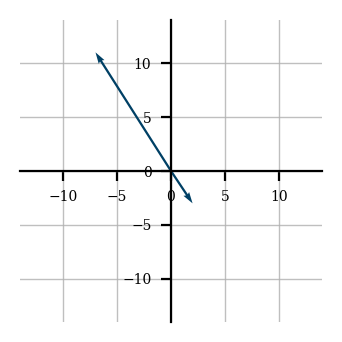

In [27]:
x = np.array((2,-3))
A = np.array([[-2, 1], [1, -3]])
vectors = [x, A@x]
plot_vector(vectors)

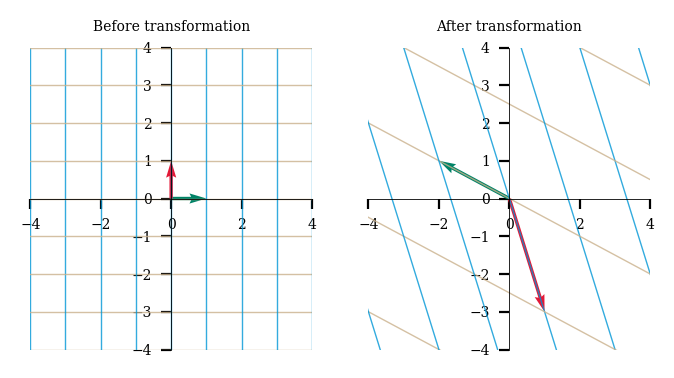

In [28]:
plot_linear_transformation(np.array(A, dtype=float))  # (1,0) -> (-2,1), (0,1) -> (1,-3)

> 즉, 위 내용을 통틀어 이를 해석한다면, $A$(=$\,\begin{bmatrix} -2 & 1 \\  1 &-3  \end{bmatrix} $ )라는 matrix는, **linear transformation와는 다른 관점으로 바라본다면**, basis $\{ \mathbf{a}, \mathbf{b}  \}$를 basis $\{ \mathbf{i}, \mathbf{j}  \}$로 바꾸는 matrix가 됩니다 (그래서 *같은* vector가  basis $\{ \mathbf{a}, \mathbf{b}  \}$에서는 좌표 (2,-3)으로 표현되고, basis $\{ \mathbf{i}, \mathbf{j}  \}$에서는 좌표 (-7,11)로 표현됨). 따라서, 이러한 관점으로 본다면, "Before transformation"의 plot은 basis가 $\{ \mathbf{a}, \mathbf{b}  \}$인 상황이고, "After transformation"의 plot은 basis를 $\{ \mathbf{a}, \mathbf{b}  \}$에서  $\{ \mathbf{i}, \mathbf{j}  \}$로 바꿔준 상황이라고 생각할 수 있습니다. 이는 "Before transformation"의 (2,-3)이 "After transformation"의 (-7,11)로 옮겨지는 것과 맞닿아 있습니다. 이를 change of basis라 하고, 뒷 장에서 더 배우게 될 것입니다.
$$ $$
> Square matrix $A:R^{n\times n}$를 바라보는 2가지 방법

* linear transformation: basis를 fix시켜놓고, 해당 basis에서 vector $x_1$가 vector $x_2$로 linearly transform 되는 것을 행렬 $A$로 표현해보자 (two different vectors in the same basis) . 
* change of basis: 같은 vector $x$는 basis를 어떻게 잡냐에 따라 좌표가 달라진다. Vector $x$를 고정시키고, basis $\mathcal{A}$를 basis $\mathcal{B}$로 바꾸는 matrix A를 찾아보자 (same vector in two different bases).

> (주의: change of basis와의 차이를 강조하기 위해 linear transformation은 basis가 고정되어 있는 상태라고 했으나, 사실 basis를 고정시키지 않아도 됩니다. 예를 들면 강의에서의 예제처럼 $R^2 \rightarrow R^3$의 transformation의 경우 애초에 input과 output의 basis가 같을 수 없는 것에서 알 수 있습니다 (하나는 2차원, 하나는 3차원 vector))

> Change of basis는 아직 강의에서 다루지 않은 내용인데, 중요하기 때문에 실습에서 먼저 진행했습니다. 내일 실습에서 더 자세히 알아보도록 하겠습니다.

## 4.3 Inverse Matrix


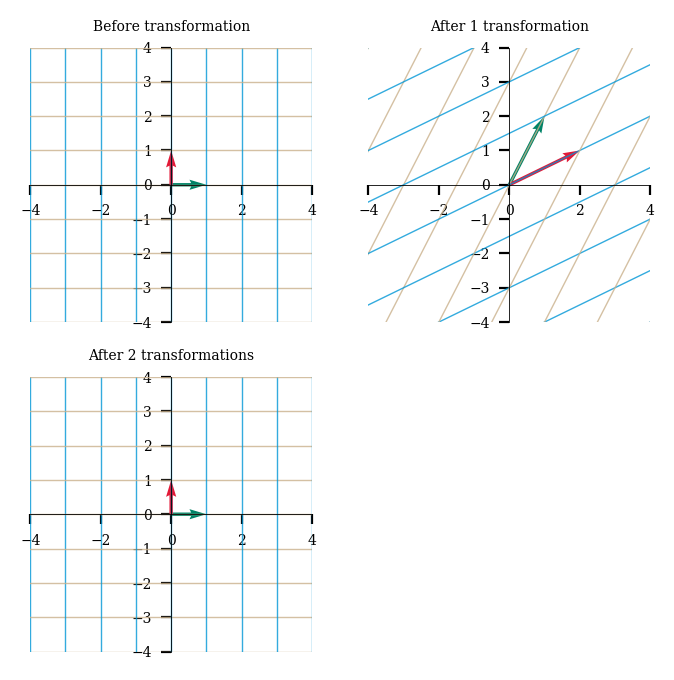

In [29]:
M = numpy.array([[1,2], [2,1]])
M_inv = inv(M)
# plot_linear_tranformations 함수는 첫번째 인자, 두번째 인자를 차례대로 적용시켜줍니다.
plot_linear_transformations(M, M_inv) 


> 행렬 $M$의 역행렬 $M^{-1}$은 $M$에 의해 linearly transformation된 직선들을 전부 원래대로 되돌려 놓는 linear transformation이다. 따라서 $M^{-1}M = I$인 것을 다시 확인할 수 있다.

## 4.4 ONTO and One-to-One
> ONTO: 공역과 치역이 같은 transformation을 이야기한다. 즉 $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$인 $T$가 있다면 $T$로 인해 나오는 치역들의 span이 $\mathbb{R}^m$을 모두 채울 수 있어야 한다.  
$$$$
> One-to-One: 치역은 하나의 정의역만 갖는 transformation을 이야기한다. 즉 다른 정의역 두 개가 같은 치역을 가지면 안 된다.

# **5. Least Square**

Least Square를 배우기 전에 먼저 Determinant와 Change of Basis에 대해 더 깊게 알아보자 한다.

## 5.1 Determinant
> 저번 장에 나왔듯이 matrix는 linear transformation으로 생각할 수 있다. 그렇기에 Determinant는 이러한 transformation이 일어날 때, multiplicative change가 일어나는 정도로 볼 수 있다. 여기서 multiplicative change는 크게 두 가지를 생각할 수 있다.
1. 어떠한 input이 matrix $A$를 통과하게 되면 부피가 얼마나 변하는가
2. 어떠한 input이 matrix $A$를 통과하게 되면 방향이 변하는가
<center>
<img src="https://github.com/akhilvasvani/Linear-Algebra-Basics/raw/6d4f0bd887d7b2c51fb0e95ad4f0659513631697/Chapters/2.11%20The%20Determinant/images/unit-square-area.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>

### 1번 의미의 경우
> 위 그림은 $i,j$로 이루어진 unit cube다. $i,j$의 길이가 1이기에 넓이도 1임을 확인할 수 있다.

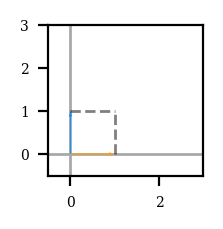

In [30]:
orange = '#FF9A13'
blue = '#1190FF'
    
i = [0, 1]
j = [1, 0]

fig = plt.figure(figsize = (1,1))
plotVectors([i, j], [[blue], [orange]], alpha=1)
plt.plot([0, 1], [1, 1], ls = '--', color = 'black', alpha = .5)
plt.plot([1, 1], [0, 1], ls = '--', color = 'black', alpha = .5)

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

이제 위 vector를 matrix $A=\begin{bmatrix}2&0\\0&2\end{bmatrix}$에 통과시키면

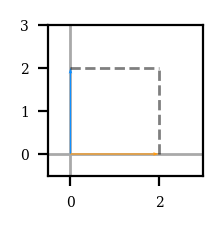

In [31]:

A = np.array([[2, 0], [0, 2]])

new_i = A.dot(i)
new_j = A.dot(j)

fig = plt.figure(figsize = (1,1))
plotVectors([new_i, new_j], [[blue], [orange]])
plt.plot([0, 2], [2, 2], ls = '--', color = 'black', alpha = .5)
plt.plot([2, 2], [0, 2], ls = '--', color = 'black', alpha = .5)

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

$A$가 diagonal matrix이기에 $i,j$를 각각 2배로 늘린 것을 볼 수 있다. 그렇기에 rotate, reflection 등이 없이 각각 2배씩만 길어지는 것을 볼 수 있다. 따라서 넓이는 4가 되고 이는 determinant와도 일치한다.

In [33]:
np.linalg.det(A)

### 2번 의미의 경우
두 번째 상황에선 unit cube에 $B=\begin{bmatrix}-2&0\\0&2\end{bmatrix}$를 통과시켜 본다.

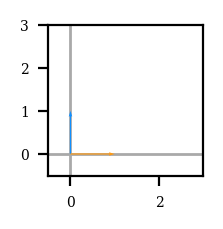

In [34]:
orange = '#FF9A13'
blue = '#1190FF'
    
i = [0, 1]
j = [1, 0]

fig = plt.figure(figsize = (1,1))
plotVectors([i, j], [[blue], [orange]])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

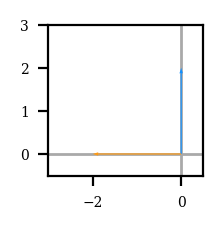

In [35]:
B = np.array([[-2, 0], [0, 2]])
new_i_1 = B.dot(i)
new_j_1 = B.dot(j)

fig = plt.figure(figsize = (1,1))
plotVectors([new_i_1, new_j_1], [['#1190FF'], ['#FF9A13']])
plt.xlim(-3, 0.5)
plt.ylim(-0.5, 3)
plt.show()

> 이번에도 각 주황색, 파랑색 vector의 길이가 2배가 됐음은 동일합니다. 따라서 determinant의 절대값은 4가 나와야 합니다.

In [36]:
np.linalg.det(B)

> 절대값이 4이긴 하지만, 앞에 - 부호가 붙어있음을 알 수 있습니다. 이는 방향(orientation)을 보존하지 못했다는 의미입니다. 

<center>
<img src="https://github.com/akhilvasvani/Linear-Algebra-Basics/raw/6d4f0bd887d7b2c51fb0e95ad4f0659513631697/Chapters/2.11%20The%20Determinant/images/positive-negative-determinant.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>

> 좌측 그림의 경우, 회전 혹은 길이의 조절을 통해서 변환이 가능한 경우입니다. 하지만 우측 그림의 경우, 오른쪽 h를 회전하거나 길이를 조정한다고 해서 왼쪽 h를 얻을 수 없고, reflection이 필요합니다.
$$$$
> 이와 같이, determinant의 절대값은 크기(volume)가 변화하는 정도, 부호는 방향(orientation)의 변화 여부를 알려줍니다.

### determinant가 0일 때  
>위의 길이가 1인 정사각형 예시로 따지면 $A$(determinant가 0인)를 거친 후 높이가 0이 된다고 생각할 수 있다. 따라서 넓이가 0이 됐기에 determinant 역시 0이 된다.  
>
> 이를 invertible 개념에 사용하면 $A$라는 함수는 single input에 대해 single output이 나와야 한다. 그런데 $A^{-1}$은 1차원을 2차원으로 복원해야 하는, 즉 single inpu에 대해 multiple output이 나와야 하므로 $A^{-1}$이라는 함수는 존재할 수 없다.

## 5.2 Change of Basis

> 모든 vector는 basis vector의 linear combination으로 표현할 수 있다. 또한 이전 챕터에서 나왔던 것처럼 같은 vector는 basis를 어떻게 잡는가에 따라 다른 좌표를 갖게 된다. vector $v=\begin{bmatrix}-3\\0\end{bmatrix}$에 standard basis($\Big\{ i,j \Big\}$)를 사용하면 $\vec{v}$의 좌표는 ($-3, 0$)이 된다. 그렇다면 basis $\Big\{ \vec{a}=\begin{bmatrix}2\\1\end{bmatrix},\vec{b}=\begin{bmatrix}1\\2\end{bmatrix} \Big\}$를 사용했을 때 좌표는 어떻게 되는가? 다시 말해

$$ Cx = v $$
### <center>(component 1의 좌표 $\times [2, 1]^T$) + (component 2의 좌표 $\times [1, 2]^T$) = v</center>

> 를 만족하는 $x$를 찾고 싶은 것이다.



> numpy의 solve함수를 이용해 $Cx=b$의 해를 구해보면

In [37]:
C = np.array([[2, 1], [1, 2]])
v = np.array([-3, 0])
x = np.linalg.solve(C, v)
x

array([-2.,  1.])

> Vector $v$는, $\Big\{ \mathbf{a}, \mathbf{b} \Big\}$의 basis에서 좌표가 (-2,1)이 됨을 알 수 있습니다. 

> 이를 visualize 해봅시다.

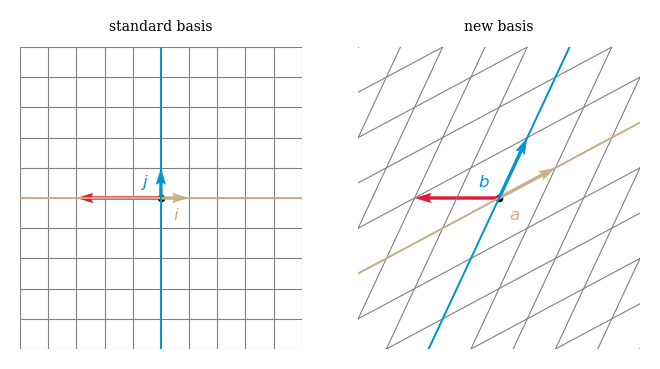

In [38]:
a = np.array([2, 1])
b = np.array([1, 2])
plot_change_basis(a, b, v) # standard basis에서 {a, b} basis로 바꿔주는 custom function

> 빨간색 vector는 $v$,  갈색 vector는 $i$와 $a$,  파란색 vector는 $j$와 $b$ 입니다. 왼쪽 plot에선, $v$는 -3*$\mathbf{i}$ + 0*$\mathbf{j}$임을 알 수 있고, 따라서 좌표가 (-3,0)이 됩니다 (저희가 일반적으로 알고 있는 standard basis에서의 좌표입니다). 오른쪽 plot에선, **같은 vector $v$** 가, -2*$\mathbf{a}$ + 1*$\mathbf{b}$로 표현됨을 알 수 있고, 따라서 좌표가 (-2,1)이 됩니다. 

* New basis로 삼을 $\mathbf{a}, \mathbf{b}$를 각 column으로 하는 matrix $C$는, $\Big\{ \mathbf{a}, \mathbf{b} \Big\}$ basis에서의 좌표 $x$를 $\rightarrow$ standard basis $\Big\{ \mathbf{i}, \mathbf{j} \Big\}$에서의 좌표 $v$로 변환해주는 matrix이다 ($Cx = v$, 즉 x는 {a,b}의 좌표, v는 {i,j}의 좌표). 

> 그럼 반대로, $\Big\{\mathbf{i}, \mathbf{j}\Big\}$의 좌표를 $\Big\{\mathbf{a}, \mathbf{b}\Big\}$의 좌표로 변환시키려면 어떤 matrix를 곱하면 될까요? 당연하게도, $C^{-1}$임을 알 수 있습니다. 

$$ x = C^{-1}v$$

> 하나만 더 나아가 생각해봅시다. 만약 우리가 어떤 vector를 standard basis 상에서(즉 왼쪽 plot에서) $x$를 반시계 방향으로 90도 회전하고 싶은데, $x$의 $\Big\{\mathbf{a}, \mathbf{b}\Big\}$에서의 좌표 (즉 오른쪽 plot에서의 좌표) 만이 주어져 있다고 합시다. 그러면 어떻게 해야 할까요? 

> 이를 계산하기 위해선, 다음과 같은 단계를 거쳐야 합니다.


1.   $\Big\{\mathbf{a}, \mathbf{b}\Big\}$의 좌표를 $\Big\{\mathbf{i}, \mathbf{j}\Big\}$로 바꾼다 (change basis: $C$).
2.   $\Big\{\mathbf{i}, \mathbf{j}\Big\}$ 상에서 반시계 방향으로 90도 회전을 한다 (linear transformation: $R$).
3.   다시 $\Big\{\mathbf{i}, \mathbf{j}\Big\}$의 좌표를 $\Big\{\mathbf{a}, \mathbf{b}\Big\}$의 좌표로 옮긴다 (change basis: $C^{-1}$) . 

> 이 셋을 연달아 수행하게 되면, $\Big\{\mathbf{a}, \mathbf{b}\Big\}$ basis에서의 linearly transformed 된 좌표를 얻을 수 있게 됩니다.

$$ \text{새로운 좌표} = C^{-1}RCx$$



In [39]:
x = np.array([-2, 1])

# 1
x1 = C@x
print("1. x_ij:", x1)

# 2
R = np.array([[0, -1], [1, 0]])
x2 = R@x1
print("2. rotated_x_ij:", x2)

# 3
C_inv = np.linalg.inv(C)
x3 = C_inv@x2
print("3. rotated_x_ab:", x3)

1. x_ij: [-3  0]
2. rotated_x_ij: [ 0 -3]
3. rotated_x_ab: [ 1. -2.]


## 5.3 Inner Product
> $\vec{u}$와 $\vec{v}$의 inner product는 아래와 같이 구할 수 있다.
$$\vec{u} \cdot \vec{v} = <\vec{u}, \vec{v}> = \vec{u}^T\vec{v}$$

> Inner product는 다음과 같은 특성들을 갖는다.
- $\vec{u} \cdot \vec{v} = \vec{v} \cdot \vec{u}$
- $(\vec{u} + \vec{v}) \cdot \vec{w} = \vec{u} \cdot \vec{w} + \vec{v} \cdot \vec{w}$
- $(c\vec{u})\cdot \vec{v} = c(\vec{u}\cdot \vec{v}) = \vec{u} \cdot (c\vec{v})$
- $\vec{u} \cdot \vec{u} \ge 0, \vec{u} \cdot \vec{u} = 0 if only \vec{u} = \empty$
- $(c_1\vec{u_1}+\cdots +c_p\vec{u_p}) \cdot \vec{w} = c_1(\vec{u_1} \cdot \vec{w}) + \cdots + c_p(\vec{u_p} \cdot \vec{w})$

## 5.4 Vector norm, Orthogonal vectors


### vector norm
> vector의 길이를 의미한다.
$$||\vec{v}||=\sqrt{\vec{v}\cdot \vec{v}}= \sqrt{v_1^2+\cdots +v_n^2}$$
$$||\vec{v}||^2=\vec{v}\cdot \vec{v}$$  


### unit vector
> vector이 길이가 1인 벡터를 말한다.
$$\vec{u}={1\over ||\vec{v}||}\vec{v}$$
> 이때, $\vec{u}$는 $\vec{v}$와 같은 방향이지만 길이가 1이다.  


### distance between vectors in $\mathbf{R}^n$
$$dist(\vec{u} - \vec{v}) = ||\vec{u} - \vec{v}||$$  


### Inner product and angle between vectors
$$\vec{u} \cdot \vec{v} = ||\vec{u}||\,||\vec{v}||cos\theta$$  


### Orthogonal vectors
> 두 벡터가 서로 수직이라면 두 벡터의 내적은 0이다.
$$\begin{aligned}\vec{u} \cdot \vec{v} &= ||\vec{u}||\,||\vec{v}||cos\theta \\ &= 0 \; (\because \theta = 90^{\circ})\end{aligned}$$  

## 5.5 Least Square

> Least square 문제는 $Ax = b$의 해가 존재하지 않을 때, 그나마 $Ax$의 값이 $b$와 가장 가까운 (i.e., 둘 사이의 L2 norm을 가장 작게 하는) $x$를 찾는 문제이다. 

$$
Ax = \hat{y} \approx b \\
\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \\ a_{41} & a_{42} & a_{43} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} \hat{y_1} \\ \hat{y_2} \\ \hat{y_3} \\ \hat{y_4} \end{bmatrix} \approx  \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ b_4 \end{bmatrix}
$$ 

> 구체적으로는, Error $E = ||b-Ax|| = ||b-\hat{y}||$를 minimize하는 x를 찾는 문제가 least square 문제입니다. $b$가 $A$의 column space에 존재한다면 $E = 0$을 만드는 $x$가 존재할 것입니다. 만약 $b$가 $A$의 column space 밖에 있다면, $E$는 0보다 크게 됩니다.
>
> 이때 가장 가까운 거리는 $\vec{b}$에서 Col $A$로 수직으로 내린 수선의 발이다. 이를 이용하면

$$\begin{aligned}\vec{b}-A\hat{x} \perp (x_1\vec{a}_1 &+ \cdots + x_n\vec{a}_n) \; (for\;any\;vector\;\vec{x}) \\
&\Downarrow \\
A^T(b - A\hat{x}) &= 0 \\
A^TA\hat{x} &= A^Tb\;(Normal\;Equation)\end{aligned}$$

> 이 나오고 이를 이용하여 $\vec{x}$를 구할 수 있습니다. 만약 $A^TA$가 invertible 하다면, $x = (A^TA)^{-1}A^Tb$ 로 구할 수 있습니다.
>
> 그렇다면 $A^TA$가 invertible하지 않을 때는 언제일까? 우선 $A^TA$와 관계없이 해는 무수히 많을 수는 있으나 해가 없을 수는 없다. 왜냐하면 해는 Col A로 내릴 수 있는 수선의 발 유무인데 항상 수선의 발은 내릴 수 있기 때문이다. 그렇기에 이걸 역으로 생각하면 해가 무수히 많을 때는 $\hat{x}$가 무수히 많을 때이다. 즉, $\hat{x}$이 Col $A$에 속한다는 의미이다. 따라서 $A$가 linearly dependent할 때, 해가 무수히 존재한다.
>
> 그러나 실제 $A^TA$은 대부분 invertible하다. 왜냐하면 $A^TA$를 구성하는 모든 데이터들이 선형종속이기엔 매우 희박하기 때문이다. 

## 5.6 Orthogonal Projection

### Orthogonal and Orthonormal Sets
> Orthogonal Set은 임의의 vector 두 개를 뽑아 내적하면 모두 0이 나온다. 왜냐하면 각 vector마다 모두 수직이기 때문이다. 이러한 Set에 길이까지 1이면 Orthonormal한 set이 된다. 이 두 sets은 모두 linearly independent하다. 

### Orthogonal and Orthonormal Basis
> 주어진 vector들을 순차적으로 수직으로 만들면 orthogonal한 basis를 얻을 수 있다. 그리고 basis가 orthonormal하다면 
$$\begin{aligned}\hat{x} &= u(u^Tu)^{-1}u^T\vec{b} \\
&= uI^{-1}u^T\vec{b} \quad (u^Tu = I) \\
&= uu^T\vec{b}
\end{aligned}$$
> 으로 식을 간단하게 만들 수 있다.

### Orthogonal Projection when $\vec{y} \in W$
> orthogonal한 vector인 $\vec{v}$와 vector $\vec{y}$에서 $\vec{v}$로 수선의 발을 내린 $\hat{y}$를 구해보면
$$\begin{aligned}
\hat{y} &= ({1\over ||\vec{v}||}\vec{v})({1\over ||\vec{v}||}\vec{v}^T)\vec{y} \\
&= {1\over ||\vec{v}||^2}\vec{v}\vec{v}^T\vec{y} \\
&= {\vec{y}^T \cdot \vec{v} \over ||\vec{v}||^2}\vec{v} \quad (\vec{v}^T\vec{y}\;is\;constant) \end{aligned}$$
> 이런 결과가 나온다. 만약 $\vec{v}$가 orthonormal한 $\vec{u}$라면
$$\hat{y}=(\vec{y}^T\cdot\vec{u})\vec{u}$$
> 로 더 간단하게 만들 수 있다.   
  
> 만약 3차원 공간이고 이미 orthongonal한 vecotr $\vec{v}_1, \vec{v}_2$를 안다면
$$\hat{y}= {\vec{y}^T \cdot \vec{v}_1 \over ||\vec{v}_1||^2}\vec{v}_1 +  {\vec{y}^T \cdot \vec{v}_2 \over ||\vec{v}_2||^2}\vec{v}_2$$
> 으로 구할 수 있다. 만약 orthonormal한 vector $\vec{u}_1, \vec{u}_2$를 안다면
$$\hat{y}=(\vec{y}^T\cdot\vec{u}_1)\vec{u}_1+(\vec{y}^T\cdot\vec{u}_2)\vec{u}_2$$
> 으로 더 간단하게 구할 수 있다.

## 5.7 Gram-Schmidt Orthonormalization  

> Gram-Schmidt orthonormalization은 주어진 basis를 orthonormal basis로 만들기 위한 method입니다. $\{x_1, x_2, x_3\}$을 $R^3$의 basis라고 합시다.

$$
x_1 = \begin{bmatrix} 1\\1\\1\\1\end{bmatrix}, x_2 = \begin{bmatrix}0\\1\\1\\1\end{bmatrix}, x_3 = \begin{bmatrix} 0\\0\\1\\1\end{bmatrix}
$$

> $x_1, x_2, x_3$은 서로 orthogonal이 아닙니다 ($x_1 \cdot x_2 \neq 0$).  Gram-Schmidt orthonormalization을 이용해서 이를 orthonormal basis $u_1, u_2, u_3$으로 바꿔보겠습니다. 이때 $u_1, u_2, u_3$는 최종적으로 다음을 만족해야 합니다.


1.  span $\{x_1, x_2, x_3\}$ = span $\{u_1, u_2, u_3\}$
2.  $u_i \perp u_j$ for $i,j \in \{1,2,3\}$ (i.e., $u_i \cdot u_j = 0 $)

> 먼저 하나의 vector를 고정한다.
$$\vec{v}_1 = \vec{x}_1\\ 
\vec{u_1} = {v_1\over ||\vec{v_1}||}$$

> 그리고 span $\{u_1\}$을 $\mathcal{W_1}$이라고 정의한다. 그리고 $v_2$를 구하기 위해 $x_2$를 $\mathcal{W_1}$에 orthogonal projection하면

$$ \hat{x_2} = \text{Proj}_{\mathcal{W_1}}x_2 = \frac{x_2 \cdot u_1}{u_1 \cdot u_1}u_1 \\
v_2 = x_2 - \hat{x_2} = x_2 -  \frac{x_2 \cdot u_1}{u_1 \cdot u_1}u_1 \\
u_2 = \frac{v_2}{||v_2||}
$$

> 으로 $u_2$도 구할 수 있다. 이제 $u_1, u_2$를 이용하여 세 번째 basis인 $u_3$을 찾으면 된다. span $\{u_1, u_2\}$을 $\mathcal{W_2}$라고 정의하면 $v_3$를 구할 수 있다.

$$ \hat{x_3} = \text{Proj}_{\mathcal{W_2}}x_3 = \frac{x_3 \cdot u_1}{u_1 \cdot u_1}u_1  + \frac{x_3 \cdot u_2}{u_2 \cdot u_2}u_2 \\
v_3 = x_3 - \hat{x_3} = x_3 -  \frac{x_3 \cdot u_1}{u_1 \cdot u_1}u_1  - \frac{x_3 \cdot u_2}{u_2 \cdot u_2}u_2 \\
u_3 = \frac{v_3}{||v_3||}
$$


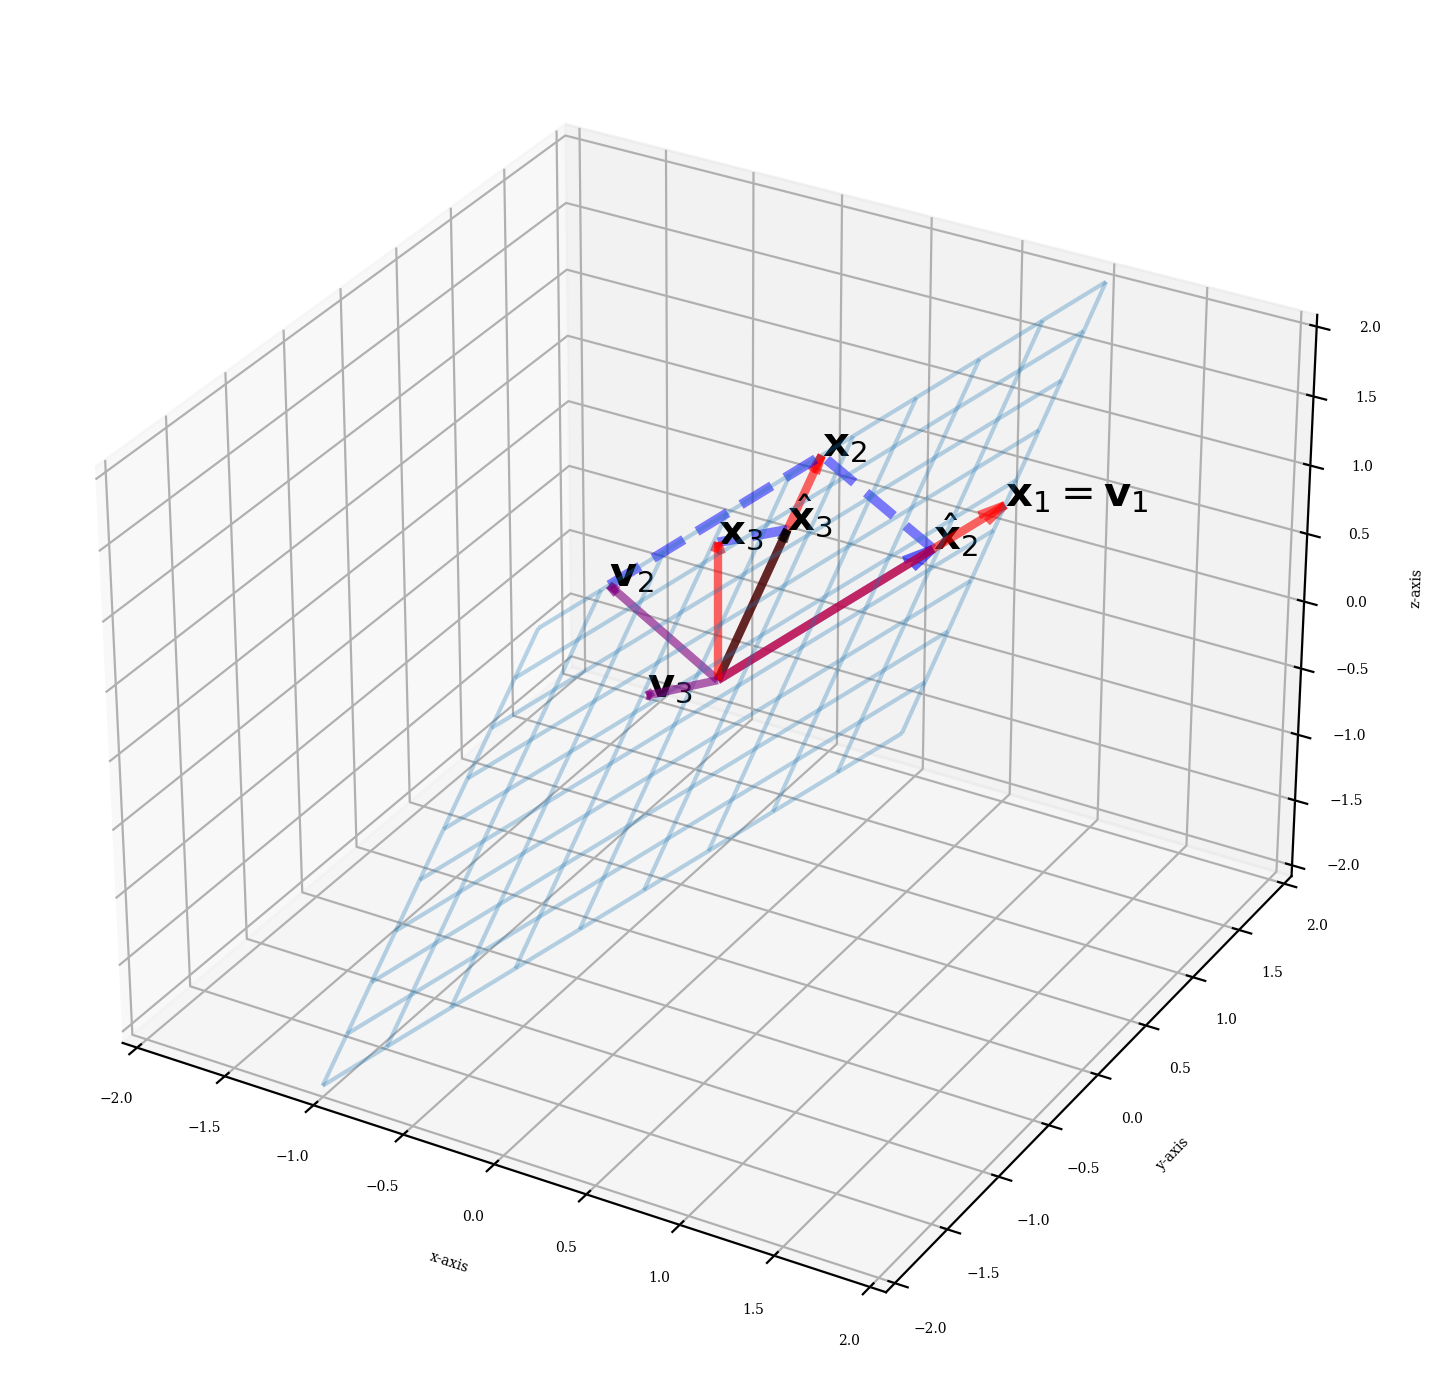

In [59]:
x1 = np.array([1, 1, 1, 1])
x2 = np.array([0, 1, 1, 1])
x3 = np.array([0, 0, 1, 1])

v1 = x1 
u1 = v1 / ((v1 ** 2).sum() ** 0.5)
# np.linalg.norm(v1) == ((v1 ** 2).sum() ** 0.5)
x2_hat = (x2@u1)*u1
v2 = x2 - x2_hat
u2 = v2 / ((v2 ** 2).sum() ** 0.5)

x3_hat = (x3@u1)*u1 + (x3@u2)*u2
v3 = x3 - x3_hat
u3 = v3/((v3**2).sum() ** 0.5)

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

# x1과 x_2의 linear combination, 즉 span
X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection='3d')
# x1, x2가 span하는 공간을 격자로 나타냅니다. 
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, x2_hat, v2, x3, x3_hat, v3 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2_hat[0],x2_hat[1], x2_hat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v2[0], v2[1], v2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


vec = np.array([[0, 0, 0, x3_hat[0], x3_hat[1], x3_hat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


vec = np.array([[0, 0, 0, v3[0], v3[1], v3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(x1[0], x1[1], x1[2], '$\mathbf{x}_1 = \mathbf{v}_1 $', size = 15)
ax.text(x2[0], x2[1], x2[2], '$\mathbf{x}_2$', size = 15)
ax.text(x2_hat[0], x2_hat[1], x2_hat[2], '$\hat{\mathbf{x}}_2$', size = 15)
ax.text(v2[0], v2[1], v2[2], '$\mathbf{v}_2$', size = 15)
ax.text(x3[0], x3[1], x3[2], '$\mathbf{x}_3$', size = 15)
ax.text(x3_hat[0], x3_hat[1], x3_hat[2], '$\hat{\mathbf{x}}_3$', size = 15)
ax.text(v3[0], v3[1], v3[2], '$\mathbf{v}_3$', size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################


point1 = [x2_hat[0], x2_hat[1], x2_hat[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [v2[0], v2[1], v2[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')


point1 = [x3_hat[0], x3_hat[1], x3_hat[2]]
point2 = [x3[0], x3[1], x3[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')


################################ Axes ######################################
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
plt.show()

> 이제 우리는 orthonormal basis $\{u_1, u_2, u_3\}$을 구했습니다. 즉, 처음에 얘기했던 조건인 $u_i \cdot u_j = 0$이 만족된 것입니다. 그럼 첫 번째 조건, span $\{x_1, x_2, x_3\}$ = span $\{u_1, u_2, u_3\}$은 만족된다.  
$$$$
> Gram-Schmidt로 유도된 식을 보면,

1. $u_1$은 $x_1$의 linear combination ($u_1 = x_1$)
2. $u_2$은 $x_1, x_2$의 linear combination
3. $u_3$은 $x_1, x_2, x_3$의 linear combination 

> 의 형태임을 알 수 있습니다. Span하는 subspace가 같다는 말은, 세 vector의 linear combination으로 만들 수 있는 vector가 같다는 말입니다. 따라서 $x_1, x_2, x_3$으로 만들 수 있는 vector를 $u_1, u_2, u_3$가 만들 수 있고, $u_1, u_2, u_3$으로 만들 수 있는 vector를 $x_1, x_2, x_3$가 만들 수 있다면 span $\{x_1, x_2, x_3\}$ = span $\{u_1, u_2, u_3\}$은 만족됩니다.
>
> 예를 들어보겠습니다. Linearly independent한 $x_1,x_2,x_3$에 대해 span $\{x_1, x_2, x_3\}$과 span $\{x_1, x_2, 2x_2 + x_3\}$이 있다고 합시다. 이때 $\{x_1, x_2, x_3\}$의 linear combination $k = \alpha_1 x_1 + \alpha_2 x_2 + \alpha_3 x_3 $인 vector k가 있다고 하면, 이는 $ \alpha_1 x_1 + (\alpha_2-2\alpha_3) x_2 + \alpha_3 (2x_2 + x_3) $와 같습니다. 즉 k는 $\{x_1, x_2, 2x_2 + x_3\}$의 linear combination으로 만들 수 있는 것입니다. 이 과정을 반대로 하면, $\{x_1, x_2, 2x_2 + x_3\}$으로 만들 수 있는 vector는 $\{x_1, x_2, x_3\}$으로 만들 수 있음을 알 수 있습니다.
>
> 이를 일반화 하면, span $\{x_1,x_2,x_3\}$은 span $\{x_1 $+ linear combination of $(x_2,x_3)$, $x_2$ + linear combination of $(x_1, x_3)$, $x_3$ + linear combination of $(x_1,x_2)\}$ 와 같음을 알 수 있습니다. $u_1, u_2, u_3$은 이를 만족하므로, 첫 번째 조건을 만족하게 됩니다.

> 세 vector $u_1, u_2, u_3$을 각 column으로 하는 matrix $U$는 orthogonal matrix가 됩니다.

In [60]:
np.vstack((u1,u2,u3)).T

array([[ 0.5  , -0.866,  0.   ],
       [ 0.5  ,  0.289, -0.816],
       [ 0.5  ,  0.289,  0.408],
       [ 0.5  ,  0.289,  0.408]])

In [61]:
U = np.vstack((u1,u2,u3)).T
U.T@U

array([[ 1.,  0., -0.],
       [ 0.,  1., -0.],
       [-0., -0.,  1.]])

In [62]:
U@U.T  # UU^T는 identity matrix가 되지 않을 수도 있다.

array([[ 1. , -0. ,  0. ,  0. ],
       [-0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0.5],
       [ 0. ,  0. ,  0.5,  0.5]])

## 5.8 QR Decomposition

> Gram-Schmidt을 하면 자연스럽게 matrix $A$의 QR Decomposition을 할 수 있다. 위에서 나온 matrix $A=\begin{bmatrix}3&1&2\\6&2&-2\\2&4&1\end{bmatrix}$와 Gram-Schmidt의 식을 이용해 구한 결과로 QR decomposition을 해보자.
$$$$
> $Q$는 위에서 구한 $U$와 동일하다. 
> 
$$U = Q = \begin{bmatrix}1/2&-3/\sqrt{12}&0\\1/2&1/\sqrt{12}&-2/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\end{bmatrix}$$

>그렇기에 $A$와 $Q$를 이용해서 먼저 $R$의 1열을 구한다. 

$$\begin{aligned}
\begin{bmatrix}1&0&0\\1&1&0\\1&1&1\\1&1&1\end{bmatrix} &= 
\begin{bmatrix}1/2&-3/\sqrt{12}&0\\1/2&1/\sqrt{12}&-2/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\end{bmatrix}
\begin{bmatrix}2&|&|\\0&|&|\\0&|&|\end{bmatrix} 
\end{aligned}$$

> $R$의 2열을 구할 때는,  Gram-Schmidt의 식을 조금 변형한다.

$$u_2 = x_2-(x_2\cdot u_1)u_1 \\ 
\begin{aligned}
x_2&=u_2+(x_2 \cdot u_1)u_1 \\ 
&={\sqrt{12}\over 4}u_2 + {3 \over 2}u_1
\end{aligned}$$ 

> 위 식의 계수를 이용하여 $R$의 2열을 채울 수 있다.

$$\begin{aligned}
\begin{bmatrix}1&0&0\\1&1&0\\1&1&1\\1&1&1\end{bmatrix} &= 
\begin{bmatrix}1/2&-3/\sqrt{12}&0\\1/2&1/\sqrt{12}&-2/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\end{bmatrix}
\begin{bmatrix}2&3/2&|\\0&\sqrt{12}/4&|\\0&0&|\end{bmatrix} 
\end{aligned}$$

> $R$의 3열도 마찬가지로 Gram-Schmidt의 식을 조금 변형한다.

$$u_3 = x_3-(x_3\cdot u_1)u_1-(x_3\cdot u_2)u_2 \\ 
\begin{aligned}
x_3&=u_3+(x_3 \cdot u_1)u_1+(x_3 \cdot u_1)u_1 \\ 
&={\sqrt{6}\over 3}u_3 + u_1 + {2 \over \sqrt{12}}u_2
\end{aligned}$$

> 위 식의 계수를 이용해 $R$의 3열까지 채우면

$$\begin{aligned}
\begin{bmatrix}1&0&0\\1&1&0\\1&1&1\\1&1&1\end{bmatrix} &= 
\begin{bmatrix}1/2&-3/\sqrt{12}&0\\1/2&1/\sqrt{12}&-2/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\\1/2&1/\sqrt{12}&1/\sqrt{6}\end{bmatrix}
\begin{bmatrix}2&3/2&1\\0&\sqrt{12}/4&2/\sqrt{12}\\0&0&\sqrt{6}/3\end{bmatrix} 
\end{aligned}$$

> QR decomposition이 모두 끝난다. 이는 $A=QR$의 형태로 분해할 수 있음을 보여준다.

In [63]:
# numpy를 이용해 QR decomposition 하기

x1 = np.array([1, 1, 1, 1])
x2 = np.array([0, 1, 1, 1])
x3 = np.array([0, 0, 1, 1])

A = np.vstack((x1, x2, x3)).T
Q, R = np.linalg.qr(A)
print(Q)
print(R)
Q@R

[[-0.5    0.866  0.   ]
 [-0.5   -0.289  0.816]
 [-0.5   -0.289 -0.408]
 [-0.5   -0.289 -0.408]]
[[-2.    -1.5   -1.   ]
 [ 0.    -0.866 -0.577]
 [ 0.     0.    -0.816]]


array([[ 1.,  0., -0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

# **6. Eigendecomposition** 


## 6.1 Eigenvectors and Eigenvalues  
> square matrix $A$에 대해서 $Ax=\lambda x$ 형태로 만들 때, nonzero인 $x$를 eigenvector라고 한다. 또한 이때, $\lambda$를 eigenvalue라고 하며 eigenvector는 방향을 유지해주는 특징을 가진다. 위 형태를 이용하면

$$Ax=\lambda x \\ Ax-\lambda x=\empty \\ (A-\lambda I)x=\empty$$

> 이렇게 바꿀 수 있다. 이때, $A$는 linearly independent하지만 $A-\lambda I$는 linearly dependent하다. 

### Characteristic Equation
> 만약 $A-\lambda I$가 invevrtible하면 

$$(A-\lambda I)^{-1}(A-\lambda I)x = (A-\lambda I)^{-1}\empty \\ x = \empty$$

> 이므로 $x=\empty$여야 한다. 그러나 $x$는 nonzero이므로 

$$det(A-\lambda I) = 0$$

> 이 되어야 한다. 이 식을 characteristic equation이라고 한다. 이렇게 eigenvalue를 구할 수 있으며 det로 $\lambda$를 구하기에 최대 n개까지 eigenvalue가 나올 수 있다.


## 6.2 Eigendecomposition
### Diagonalization
> Diagnoalization은 임의의 square matrix $A$를 대각행렬로 만들어 주는 것으로 

$$D=V^{-1}AV \; (V \in \mathbb{R}^{n \times n}, V\;is\;invertible)$$

> 위의 식으로 구할 수 있다. 그리고 이렇게 만들어진 $D$를 diagonal matrix라고 한다. $D$는 

$$D=\begin{bmatrix}\lambda_1 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & \lambda_n \end{bmatrix}$$

> 그리고 이 식을 이용하면 

$$AV=DV \\ Av_1=\lambda_1v_1, \; \cdots, \; Av_n=\lambda_nv_n$$

> 이 성립함을 알 수 있다. 또한 diagonalization을 하기 위해선 $V$가 $\mathbb{R}^{n\times n}$ 형태의 square matrix이고 서로 linearly independent해야 한다. 즉, diagonalization하기 위해선 차원과 같은 수의 eigenvector들을 가져야 한다.

$$$$

> 그렇다면 이제 diagonalization을 이용하여 A를 분해할 수 있다.

$$A=VDV^{-1}$$

> 이를 $A$의 *Eigendecomposition*이라 하며 diagonalization이 가능한 $A$는 eigendecomposition이 가능하다. 또한 $A^k$ 역시 eigendecomposition을 이용해 쉽게 구할 수 있다.

$$A^k=(VDV^{-1})(VDV^{-1})\cdots(VDV^{-1})=VD^kV^{-1} \\
D^k=\begin{bmatrix}\lambda_1^k & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & \lambda_n^k \end{bmatrix}$$

## 6.3 Geometry of Eigendecomposition
> 행렬 $A=\begin{bmatrix}2&1\\1&2\end{bmatrix}$로 표현되는 linear transformation가 있을 때, $\begin{bmatrix}1\\0\end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 $A$에 의해 tranform되는 과정은 다음과 같다.

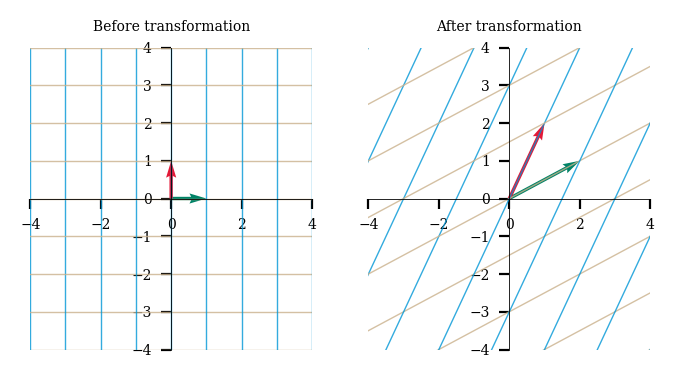

In [2]:
A = np.array([[2, 1], [1, 2]])
plot_linear_transformation(A)

> $A$는 $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ 을 $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$로, $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$을 $\begin{bmatrix} 1 \\ 2 \end{bmatrix}$로 옮기는 linear transformation입니다. $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ 외에 다른 vector들은 어떻게 옮겨지는 지 visualize 해봅시다.

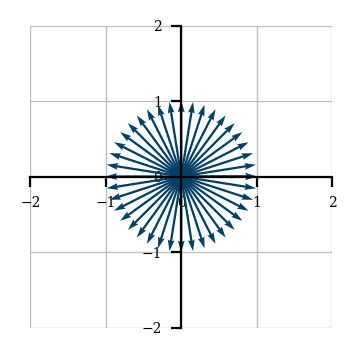

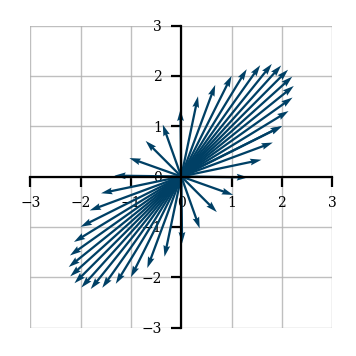

In [7]:
# 길이가 1인 vector들
alpha = np.linspace(0, 2*np.pi, 41) # x축과의 각도(0 ~  2pi)
vectors = list(zip(np.cos(alpha), np.sin(alpha)))
vectors = np.array(vectors)

newvectors = (A @ vectors.T).T

plot_vector(vectors) # plot_vector는 주어진 vector들을 plot하는 custom function
plot_vector(newvectors) # vectors들을 A로 transform한 newvectors

> 위 $A$는 원을 타원으로 만드는 linear transformation임을 확인할 수 있습니다. 이 타원의 semi major axis (장축의 절반), semi minor axis (단축의 절반)을 찾기 위해선, transform된 newvectors의 길이가 가장 길고 짧은 두 vector를 찾으면 됩니다.

In [8]:
lengths = np.linalg.norm(newvectors, axis=1) # newvectors 각각의 norm

semi_major_index = np.argmax(lengths) # norm이 가장 긴 것이 타원의 장축
semi_major_vector = newvectors[semi_major_index]
semi_major_length = lengths[semi_major_index]

semi_minor_index = np.argmin(lengths) # norm이 가장 짧은 것이 타원의 단축
semi_minor_vector = newvectors[semi_minor_index]
semi_minor_length = lengths[semi_minor_index]

print(semi_major_vector, semi_major_length)
print(semi_minor_vector, semi_minor_length)

[2.121 2.121] 3.0000000000000004
[-0.707  0.707] 1.0


> 장축은 $y=x$ 위에 있는 vector, 즉 x축과 45도를 이루는 vector임을 알 수 있습니다. 단축은 $y=-x$ 위에 있는 vector, 즉 x축과 $-45(=\pi/4)$도를 이루는 vector임을 알 수 있습니다. 이 두 vector $\begin{bmatrix} -2.121 \\ -2.121 \end{bmatrix}$, $\begin{bmatrix} -0.707 \\ 0.707 \end{bmatrix}$은 원래 원의 어느 vector가 linear transform된 것일까요? 


> 이를 구하기 위해 $A^{-1}$을 곱해서, 원래 vector를 구해봅시다.

In [9]:
A_inv = np.linalg.inv(A)
v1 = A_inv @ semi_major_vector
v2 = A_inv @ semi_minor_vector

print(v1) # v1 -> A -> 장축
print(v2) # v2 -> A -> 단축

[0.707 0.707]
[-0.707  0.707]


> $v_1$과 semi major vector, 그리고 $v_2$와 semi minor vector은 각각 방향이 같습니다 ($v_1$과 semi major vector는 y=x, $v_2$와 semi minor vector는 $y=-x$위에 존재). 즉 $Av_1 = 3v_1, Av_2=1v_2$임을 알 수 있습니다. 따라서, 위 $A$는 원을 타원으로 바꾸는 matrix이며, 이때 타원의 장축, 단축이 각각 eigenvector가 됨을 알 수 있습니다. 


**(주의) 이는 모든 타원에 대해서 성립하는 것이 아닙니다. $A$가 symmetric matrix라는 점이 중요한데, 실습 마지막 부분에서 더 자세히 알아보겠습니다.**

### Scaling과 Rotation으로 $A$ 만들기

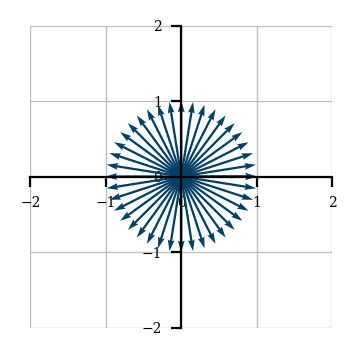

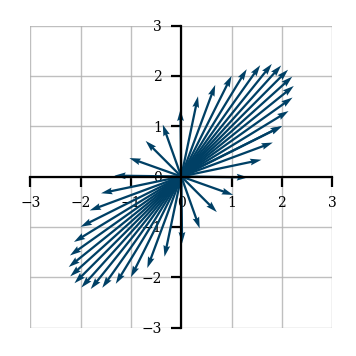

In [11]:
plot_vector(vectors)
plot_vector(newvectors)

> $A$로 만들어진 타원(newvectors)을 보면, scaling과 rotation의 조합으로 만들 수 있는 것처럼 보입니다. 예를 들면, 반지름이 1인 원(vectors)을 (1) 가로로 3배(장축 방향의 eigenvalue가 3이니까) 늘린 다음 (i.e., y축 성분은 그냥 놔두고, x축 성분을 3배), (2) 시계 반대방향으로 45를 돌린다면 위의 타원을 만들 수 있지 않을까요? 한번 이를 visualize 해봅시다.

참고) 반시계방향으로 회전시키는 행렬
<center>
<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp4_landlinear/blob/master/images/rotation.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>


$$R = \begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix}$$


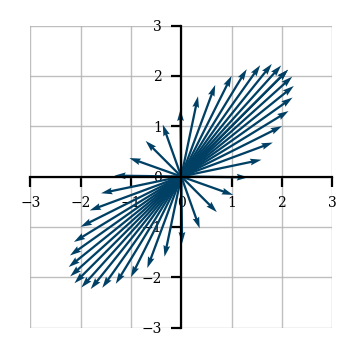

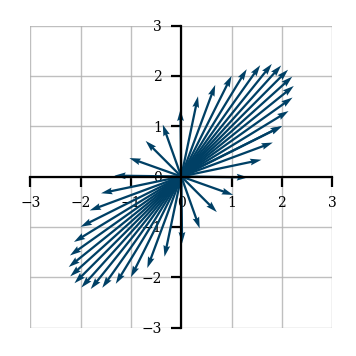

In [13]:
S = np.array([[3, 0], [0, 1]]) # 가로를 3배 scaling하는 2 x 2 matrix
ellipse = (S@vectors.T).T # S에 의해 늘려진 vector들

theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]]) # 반시계방향으로 45도 회전시키는 matrix
rotated_ellipse = (R@ellipse.T).T

plot_vector(rotated_ellipse) # scaling과 rotation으로 만든 transformation
plot_vector(newvectors) # 위에서 만든 transformtaion

> 위 그림을 비교하면 같은 transformation으로 보인다. 그러나 vector 하나 하나를 transformation해보면 $R$과 $S$의 조합이 $A$가 아님을 알 수 있다.

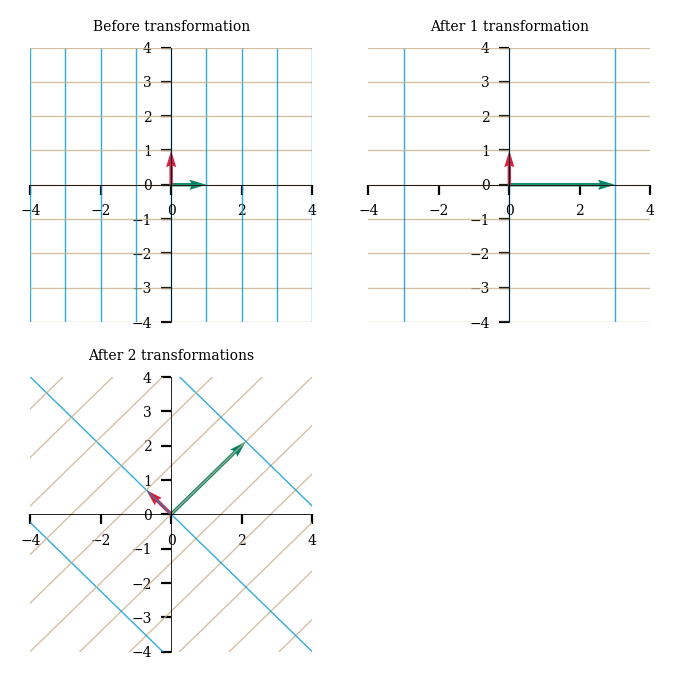

In [14]:
plot_linear_transformations(S, R)

> 위에서 $v_1$은 matrix $A$의 eigenvector임을 알 수 있었습니다 ($Av_1 = 3v_1$). 하지만, 위 그림에선 변환 전 (Before transformation)의 초록색 vector $\mathbf{i}$가, 변환 후 (After 2 transformations)의 초록색 vector $\begin{bmatrix} \alpha \\ \alpha \end{bmatrix}$가 됨을 알 수 있습니다 ($\alpha$는 상수). 이 말은, $v_1$는 $S$@$R$의 eigenvector가 아니라는 뜻입니다. vector의 방향이 바뀌기 때문입니다.

$$A\begin{bmatrix} \alpha \\ \alpha \end{bmatrix} = 3 \begin{bmatrix} \alpha \\ \alpha \end{bmatrix} \\
RS\begin{bmatrix} \alpha \\ \alpha \end{bmatrix} \neq 3\begin{bmatrix} \alpha \\ \alpha \end{bmatrix}$$

> 그럼 $v_1$은 실제로 어떻게 바뀌고 있을까요? 

[0.707 0.707]
[1. 2.]


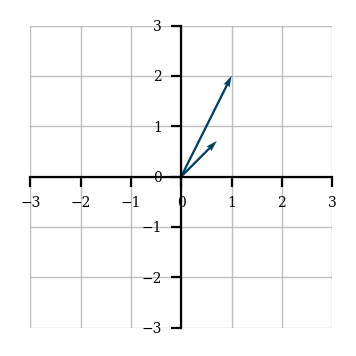

In [15]:
scaled_v1 = np.linalg.norm(v1)
rotated_scaled_v1 = R@S@v1
plot_vector([v1, rotated_scaled_v1])

print(v1)
print(rotated_scaled_v1)

> 즉 v1이 크기 뿐 아니라 방향마저 바뀌었음을 알 수 있고, 눈으로 언뜻 보기와는 다르게 $A$와 $R$@$S$는 다름을 알 수 있습니다.

$$ A \neq RS$$

### $A$의 Eigendecomposition

> 그렇다고 rotation과 scaling의 조합으로 $A$를 만들 수 없는 것은 아니다.
1) 시계방향으로 45도 회전
2) scaling
3) 반시계방향으로 45도 회전
> 위 과정을 순차적으로 진행하면 $A$를 만들 수 있다. 이때 시계방향으로 회전시키는 matrix는 $R=\begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix}$에서 $\theta$를 $-\theta$로 바꾸면 된다. 이때 $R$은 orthonormal matrix이기에 

$$시계방향으로 \theta만큼 회전하는 matrix=R^{-1}=R^T$$

> 이 성립한다. 이 행렬과 위 방법을 이용해 A를 만들어보면

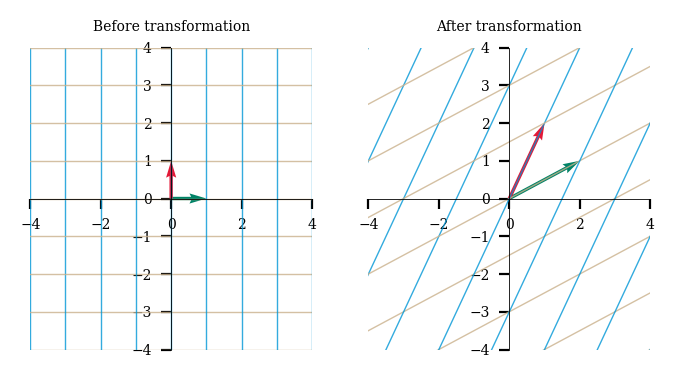

In [16]:
theta = np.pi / 4
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
plot_linear_transformation(R @ S @ R.T)

> 위와 같이 나온다. 이를 자세히 확인하기 위해 $R, S, R^T$를 하나씩 살펴볼 것이다. 먼저 $R^T$를 확인해보면

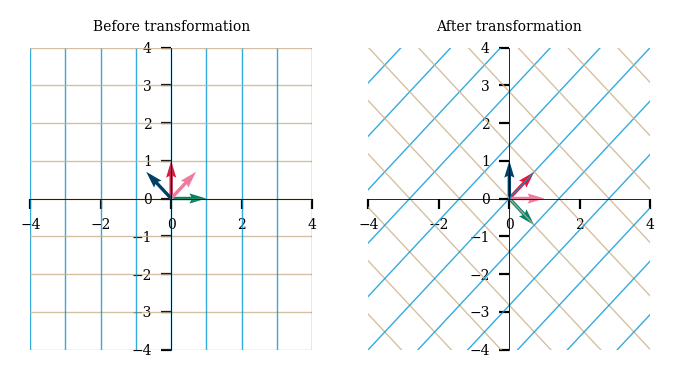

In [20]:
plot_linear_transformation(R.T, v1, v2)

> $y=x, y=-x$ 위에 있는 $v_1$(파랑), $v_2$(분홍)가 시계방향으로 45도 돌아가서 $\begin{bmatrix}1\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 된 것을 확인할 수 있습니다. 이제 scaling을 적용해 봅시다.

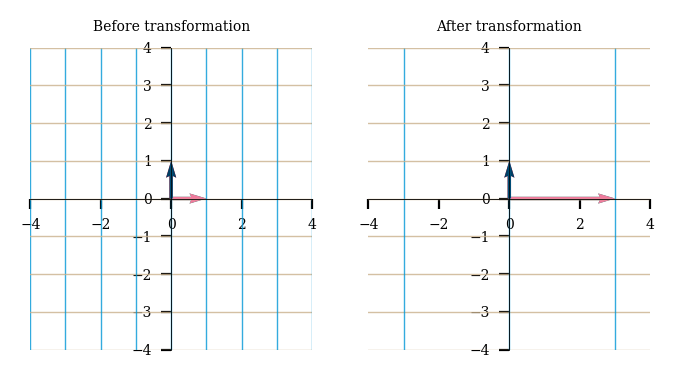

In [21]:
rotated_v1 = R.T @ v1
rotated_v2 = R.T @ v2

scaled_rotated_v1 = S @ rotated_v1
scaled_rotated_v2 = S @ rotated_v2

plot_linear_transformation(S, rotated_v1, rotated_v2)

> $\begin{bmatrix}1\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 x축 방향으로 3배 길어져서, $\begin{bmatrix}3\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 된 것을 확인할 수 있습니다. 이제 다시 반시계방향으로 45도를 돌려봅시다.

[2.121 2.121] [-0.707  0.707]


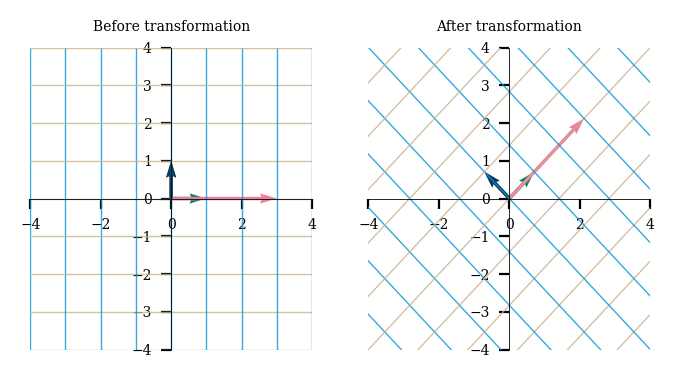

In [22]:
rotated_scaled_rotated_v1 = R@scaled_rotated_v1
rotated_scaled_rotated_v2 = R@scaled_rotated_v2

plot_linear_transformation(R, scaled_rotated_v1, scaled_rotated_v2)
print(rotated_scaled_rotated_v1, rotated_scaled_rotated_v2)

> $\begin{bmatrix}3\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 반시계 방향으로 돌아가서, $\begin{bmatrix}2.121\\2.121 \end{bmatrix}, \begin{bmatrix}-0.707\\0.707\end{bmatrix}$이 된 것을 확인할 수 있습니다. 즉 $v_1 \rightarrow 3v_1$, $v_2 \rightarrow v_2$이 됩니다. 결론적으로

$$ v_1 \xrightarrow{rotate(-\theta)} \xrightarrow{scaling} \xrightarrow{rotate(\theta)} 3v_1 \\ 
v_2 \xrightarrow{rotate(-\theta)} \xrightarrow{scaling} \xrightarrow{rotate(\theta)} v_2 \\
A = RSR^T$$

> 이 됩니다. $v_1, v_2$가 rotate($-\theta$)로  $\begin{bmatrix}1\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 된 것에서 짐작할 수 있듯, rotate(-$\theta$)은 eigenvector $v_1, v_2$를 one-hot vector로 만들게 됩니다 ($v_1$은 첫 번째, $v_2$는 두 번째 component만 non-zero). 이는 예전에 배웠던 change of basis와 연관되는데, 이를 이용해 eigendecomposition을 정리해보도록 하겠습니다.

### Eigendecomposition 정리

> 이번 실습에서 예시로 들었던 $A$는 symmetric matrix입니다. 하지만 (1) matrix $A$를 거쳐서 나온 타원의 장축, 단축이 $A$의 eigenvector가 되는 것, 그리고 (2) 모든 행렬이 rotation과 scaling의 조합으로 쪼갤 수 있는것, 두 성질은 모든 임의의 matrix에 대해 성립하는 것은 아닙니다. 지금부터는 6.2장에서 보았던 것처럼, 보다 일반적으로 eigendecomposition을 유도하도록 하겠습니다.

$$
\begin{align*}
  A \mathbf{v_1} = s_1 \mathbf{v_1} \\
  A \mathbf{v_2} = s_2 \mathbf{v_2}
\end{align*}
$$

> 위 두 식은 matrix의 곱 형태로 나타낼 수 있습니다.

$$ A \begin{bmatrix}
    \mid & \mid \\
    \mathbf{v_1} & \mathbf{v_2}\\
    \mid & \mid
    \end{bmatrix}
    = \begin{bmatrix}
    A\mathbf{v_1} & A\mathbf{v_2}
    \end{bmatrix}
$$

$$ A \begin{bmatrix}
    \mid & \mid \\
    \mathbf{v_1} & \mathbf{v_2} \\
    \mid & \mid \\
    \end{bmatrix}
    = \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
$$

> $\begin{bmatrix} s_1\mathbf{v_1} & s_2\mathbf{v_2} \end{bmatrix}$는 다음과 같이 표현이 가능합니다.


$$ s_1 \mathbf{v_1} = \begin{bmatrix}  \mid & \mid \\  \mathbf{v_1} & \mathbf{v_2} \\ \mid & \mid  \end{bmatrix} \begin{bmatrix} s_1 \\ 0 \end{bmatrix} $$

$$ s_2 \mathbf{v_2} = \begin{bmatrix}  \mid & \mid \\  \mathbf{v_1} & \mathbf{v_2} \\  \mid & \mid \end{bmatrix} \begin{bmatrix} 0 \\ s_2 \end{bmatrix} $$

$$  \begin{bmatrix}s_1\mathbf{v_1} & s_2\mathbf{v_2} \end{bmatrix} = 
\begin{bmatrix}  \mid & \mid \\  \mathbf{v_1} & \mathbf{v_2} \\  \mid & \mid \end{bmatrix} \begin{bmatrix} s_1 & 0 \\ 0 & s_2 \end{bmatrix} $$

> $V$를 eigenvector를 column으로 갖는 matrix $\begin{bmatrix} \mid & \mid \\ \mathbf{v_1} & \mathbf{v_2} \\\mid & \mid \\\end{bmatrix}$라고 하고, $\begin{bmatrix} s_1 & 0 \\ 0 & s_2 \end{bmatrix}$를 D라고 합시다. 그렇다면 결론적으로

$$ AV = VD $$

> 를 유도할 수 있습니다. $V$의 역행렬이 존재한다면,

$$ A = VDV^{-1} \\ D = V^{-1}AV $$

> 이 됩니다. 위와 같은 형태로 A가 decompose 될 수 있으면, A를 diagonalizable이라고 합니다. 사실 우리는 이를 이전 실습에서 본 적이 있습니다. 5.2장의 change of basis를 공부할 때, **같은 linear transformation을 새로운 basis에서 계산하려고 할 때**, 정확히 위와 같은 형태로 유도되었습니다.
>
> $V$를 change of basis로 본다면, $VDV^{-1}$는 어떤 의미가 될까요? 저번 실습에서 배웠던 것을 떠올려 본다면, (1) $V^{-1}$: standard basis ($\{ \mathbf{i}, \mathbf{j}\}$) 에서 eigenbasis ($\{ \mathbf{v_1}, \mathbf{v_2}\}$)로 basis를 change하고, (2) $D=\begin{bmatrix}s_1&0\\0&s_2\end{bmatrix}:$ $\mathbf{v_1}$ 방향의 성분 (eigenbasis에서의 좌표의 첫 번째 성분)에 $s_1$을 곱해주고, $\mathbf{v_2}$ 방향의 성분 (eigenbasis에서의 좌표의 두 번째 성분)에 $s_2$을 곱해준 다음, (i.e., elementwise scaling) (3) 다시 standard basis로 되돌리는 행위가 됩니다.

$$
  A\, \mathbf{x} = V\, D\, V^{-1}\mathbf{x}
$$

> 위와 같은 형태로 나타낼 수 있는 A, D를 **similar** 하다고 합니다. 즉 어떤 두 matrix가 같은 linear transformation을 나타내는데 basis만 다른 경우에, 두 matrix는 similar한 관계에 있다고 합니다. 
$$$$
> 이제 non-symmetric matrix인  $B = \begin{bmatrix} 1 & 0 \\ 1 & 3 \end{bmatrix}$의 eigendecomposition을 visualize 해봅시다.

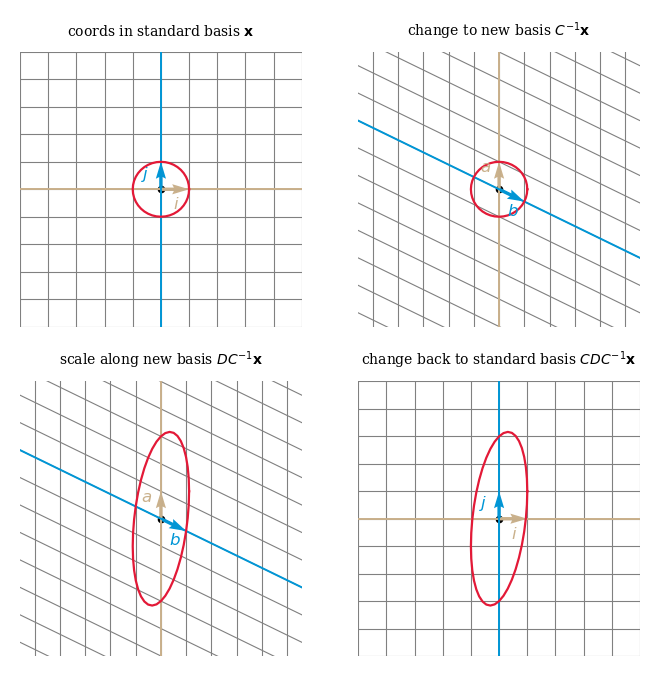

In [23]:
B = np.array([[1,0], [1,3]])
plot_eigen(B)

> 갈색, 파랑색 vector는 basis를 나타내고, 왼쪽 위의 빨간색 원은 길이가 1인 vector들의 set입니다 ($x$는 빨간색 원 위의 벡터 하나하나를 나타냅니다).
>
> 위 설명의 $V$를 $C$라고 하고, $v_1, v_2$는 $\mathbf{a,b}$라고 합시다 ($V=C$, $v_1=\mathbf{a}$, $v_2=\mathbf{b}$).  $C^{-1}x$는 standard basis에서 eigenbasis로 바꾸는 행위입니다. 따라서 basis $\mathbf{i,j}$는 $\mathbf{a,b}$로 바뀌었고, 빨간색 원은 바뀌지 않았습니다. 왜냐하면, change of basis는 vector를 고정시킨 채 축만 바꾸는 것이기 때문입니다.
>
> $DC^{-1}x$는 $C^{-1}$에 $D$로 scaling한 결과입니다. 축은 바뀌지 않았기 때문에 $\mathbf{a,b}$는 유지되고, 빨간색 원 vector의 $\mathbf{a}$ 성분은 3배, $\mathbf{b}$ 성분은 1배 (eigenvalue) 가 됩니다. 강의에서 배웠듯, matrix 계산에서 scalar 계산으로 바뀌기 때문에 (4번 계산할 것을 2번만 계산해도 됨), computational advantage가 생기게 됩니다.
>
> $CDC^{-1}x$는 $DC^{-1}x$의 basis를 다시 standard basis로 되돌리는 행위가 됩니다. 마찬가지로 change of basis는 vector를 고정시킨 채 축만 바꾸기 때문에 빨간색 원을 바뀌지 않고, basis만 $\mathbf{a,b}$는 $\mathbf{i,j}$로 바뀌게 됩니다.

# **7. Advanced Eigendecomposition**

## 7.1 Symmetric matrix

> 만약 행렬 $A$가 symmetric하면 다른 eigenspace로부터 구할 수 있는 임의의 두 eigenvector는 orthogonal하다. 이를 증명해보자.
$$$$
$$A=\begin{bmatrix}2&6\\5&3\end{bmatrix}$$
> 위와 같은 행렬 $A$를 이용하여

$$Av=\lambda v \Rightarrow \lambda I v \\ 
\begin{aligned}Av-\lambda Iv &= (A-\lambda I)v \\
&= \begin{bmatrix}2-\lambda&6\\5&3-\lambda\end{bmatrix}v \\ 
&= \empty \end{aligned}$$

> 위 식을 유도할 수 있다. 이때 $A-\lambda I$의 역행렬이 존재하면 $v$의 해가 $\empty$밖에 없으므로 $A-\lambda I$는 역행렬이 없어야 $v \neq \empty$인 해를 구할 수 있다.

$$det(A-\lambda I) = 0 \\
\Downarrow \\
(2-\lambda)(3-\lambda)-30=0 \\
(\lambda-8)(\lambda+3)=0 \\
\therefore \lambda=8 or -3$$

> 만약 $\lambda=8$이면

$$\begin{bmatrix}-6&6\\5&-5\end{bmatrix}v = \begin{bmatrix}0\\0\end{bmatrix} \\
v=\begin{bmatrix}1\\1\end{bmatrix} \\ 
(eigenvalue=8 \rightarrow eigenvector=v)$$

> 만약 $\lambda=-3$이면

$$\begin{bmatrix}5&6\\5&6\end{bmatrix}v = \begin{bmatrix}0\\0\end{bmatrix} \\
v=\begin{bmatrix}1\\-5/6\end{bmatrix} \\
(eigenvalue=8 \rightarrow eigenvector=v)$$

> 이 나온다. 만약 중근이 있으면 중근의 개수는 eigenvalue만큼 나오지 않는다.

# **8. Singular Value Decomposition**